In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from hyperopt import hp
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from xgboost import plot_importance
import lightgbm
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

Kaggle Competitions<br>
Santander Customer Satisfaction<br>
Which customers are happy customers?

일선 지원 팀에서 최고 경영진에 이르기까지 고객 만족은 성공의 핵심 척도입니다. 만족도가 낮은 고객은 은행의 서비스를 더이상 이용하지 않습니다. 더나가 불만족 고객은 서비스 이용을 중단하기 전에 불만을 표현하는 경우가 거의 없습니다.

Santander Bank는 Kagglers에게 서비스 초기에 불만족한 고객을 식별할 수 있도록 도와달라고 요청하고 있습니다. 그렇게 하면 Santander는 시기를 놓치지 않고 고객의 행복을 개선하기 위한 사전 조치를 취할 수 있습니다.

이 대회에서는 수백 가지의 익명화된 기능을 사용하여 고객이 은행 업무 경험에 만족하는지 불만족하는지 예측하게 됩니다.

제출물은 예측 확률과 관찰 대상 사이의 ROC 곡선 아래 영역에서 평가됩니다.

상금 : U$ 60,000

https://www.kaggle.com/c/santander-customer-satisfaction

In [4]:
cust_df = pd.read_csv("dataSet/santander/train_santander.csv", encoding = "latin=1")
print("dataset shape : ", cust_df.shape)
cust_df.head(3)

dataset shape :  (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [6]:
cust_df

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0


In [7]:
cust_df.var3.value_counts()

 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 231           1
 188           1
 168           1
 135           1
 87            1
Name: var3, Length: 208, dtype: int64

In [8]:
print(cust_df["TARGET"].value_counts())

unsatisfied_cnt = cust_df[cust_df["TARGET"] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print(f"불만족 고객 비율 : {unsatisfied_cnt/total_cnt*100 : .2f}%")

0    73012
1     3008
Name: TARGET, dtype: int64
불만족 고객 비율 :  3.96%


In [9]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [10]:
cust_df["var3"].replace(-999999, 2, inplace = True)
cust_df.drop("ID", axis = 1, inplace = True)

X_features = cust_df.iloc[:,:-1]
y_labels = cust_df.iloc[:,-1]
print(f"피처 데이터 shape : {X_features.shape}")

피처 데이터 shape : (76020, 369)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size = 0.2, random_state = 0)

train_cnt = y_train.count()
test_cnt = y_test.count()
print(f"학습 세트 Shape : {X_train.shape}, 테스트 세트 shape : {X_test.shape}")

print("학습 세트 레이블 값 분포 비율")
print(y_train.value_counts()/train_cnt)
print("테스트 세트 레이블 값 분포 비율")
print(y_test.value_counts()/test_cnt)

학습 세트 Shape : (60816, 369), 테스트 세트 shape : (15204, 369)
학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64
테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [17]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 156)

In [18]:

xgb_clf = XGBClassifier(n_estimators = 500, learning_rate = 0.05, random_state = 156)

xgb_clf.fit(X_tr, y_tr, early_stopping_rounds = 100, eval_metric = "auc", eval_set = [(X_tr,y_tr),(X_val,y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print(f"ROC SCORE : {xgb_roc_score:.4f}")

[0]	validation_0-auc:0.81881	validation_1-auc:0.81080
[1]	validation_0-auc:0.82619	validation_1-auc:0.81672
[2]	validation_0-auc:0.82881	validation_1-auc:0.81742
[3]	validation_0-auc:0.82930	validation_1-auc:0.81735
[4]	validation_0-auc:0.83114	validation_1-auc:0.81829
[5]	validation_0-auc:0.83244	validation_1-auc:0.81911
[6]	validation_0-auc:0.83679	validation_1-auc:0.82092
[7]	validation_0-auc:0.83831	validation_1-auc:0.82126
[8]	validation_0-auc:0.83968	validation_1-auc:0.82065
[9]	validation_0-auc:0.84015	validation_1-auc:0.82118
[10]	validation_0-auc:0.84213	validation_1-auc:0.82320
[11]	validation_0-auc:0.84216	validation_1-auc:0.82338
[12]	validation_0-auc:0.84235	validation_1-auc:0.82344
[13]	validation_0-auc:0.84365	validation_1-auc:0.82411
[14]	validation_0-auc:0.84433	validation_1-auc:0.82426
[15]	validation_0-auc:0.84422	validation_1-auc:0.82412
[16]	validation_0-auc:0.84482	validation_1-auc:0.82403
[17]	validation_0-auc:0.84523	validation_1-auc:0.82414
[18]	validation_0-au

[149]	validation_0-auc:0.90371	validation_1-auc:0.83840
[150]	validation_0-auc:0.90377	validation_1-auc:0.83841
[151]	validation_0-auc:0.90389	validation_1-auc:0.83831
[152]	validation_0-auc:0.90391	validation_1-auc:0.83834
[153]	validation_0-auc:0.90397	validation_1-auc:0.83830
[154]	validation_0-auc:0.90405	validation_1-auc:0.83824
[155]	validation_0-auc:0.90413	validation_1-auc:0.83823
[156]	validation_0-auc:0.90419	validation_1-auc:0.83829
[157]	validation_0-auc:0.90439	validation_1-auc:0.83821
[158]	validation_0-auc:0.90444	validation_1-auc:0.83813
[159]	validation_0-auc:0.90454	validation_1-auc:0.83810
[160]	validation_0-auc:0.90460	validation_1-auc:0.83803
[161]	validation_0-auc:0.90476	validation_1-auc:0.83799
[162]	validation_0-auc:0.90478	validation_1-auc:0.83798
[163]	validation_0-auc:0.90496	validation_1-auc:0.83800
[164]	validation_0-auc:0.90504	validation_1-auc:0.83800
[165]	validation_0-auc:0.90507	validation_1-auc:0.83792
[166]	validation_0-auc:0.90515	validation_1-auc:

In [23]:
xgb_search_space = {"max_depth" : hp.quniform("max_depth", 5, 15, 1),
                   "min_child_weight" : hp.quniform("min_child_weight", 1, 6, 1),
                   "colsample_bytree" : hp.uniform("colsample_bytree", 0.5, 0.95),
                   "learning_rate" : hp.uniform("learning_rate", 0.01, 0.2)}

In [20]:

def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators = 100, max_depth = int(search_space["max_depth"]),
                           min_child_weght = int(search_space["min_child_weight"]),
                           colsample_bytree = search_space["colsample_bytree"],
                           learning_rate = search_space["learning_rate"])
    
    roc_auc_list = []
    
    kf = KFold(n_splits = 3)
    
    for tr_index, val_index in kf.split(X_train):
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        
        xgb_clf.fit(X_tr, y_tr, early_stopping_rounds = 30, eval_metric = "auc",
                   eval_set = [(X_tr, y_tr), (X_val, y_val)])
        
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:,1])
        roc_auc_list.append(score)
        
    return -1* np.mean(roc_auc_list)

In [25]:
from hyperopt import fmin, tpe, Trials

trials = Trials()
best = fmin(fn = objective_func, space = xgb_search_space, algo = tpe.suggest, max_evals = 50)
print("best : ", best)

[10:48:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_child_weght" } are not used.

[0]	validation_0-auc:0.82037	validation_1-auc:0.79418                                                                  
[1]	validation_0-auc:0.82887	validation_1-auc:0.80197                                                                  
[2]	validation_0-auc:0.83345	validation_1-auc:0.80441                                                                  
[3]	validation_0-auc:0.83569	validation_1-auc:0.80581                                                                  
[4]	validation_0-auc:0.83795	validation_1-auc:0.80864                                                                  
[5]	validation_0-auc:0.84071	validation_1-auc:0.81100                                                                  
[6]	validation_0-auc:0.84248	validation_1-auc:0.81255                      

[66]	validation_0-auc:0.89433	validation_1-auc:0.83153                                                                 
[67]	validation_0-auc:0.89481	validation_1-auc:0.83170                                                                 
[68]	validation_0-auc:0.89573	validation_1-auc:0.83189                                                                 
[69]	validation_0-auc:0.89658	validation_1-auc:0.83206                                                                 
[70]	validation_0-auc:0.89734	validation_1-auc:0.83232                                                                 
[71]	validation_0-auc:0.89834	validation_1-auc:0.83193                                                                 
[72]	validation_0-auc:0.89881	validation_1-auc:0.83210                                                                 
[73]	validation_0-auc:0.89956	validation_1-auc:0.83206                                                                 
[74]	validation_0-auc:0.90008	validation

[32]	validation_0-auc:0.87252	validation_1-auc:0.83045                                                                 
[33]	validation_0-auc:0.87316	validation_1-auc:0.83138                                                                 
[34]	validation_0-auc:0.87399	validation_1-auc:0.83179                                                                 
[35]	validation_0-auc:0.87461	validation_1-auc:0.83200                                                                 
[36]	validation_0-auc:0.87513	validation_1-auc:0.83215                                                                 
[37]	validation_0-auc:0.87583	validation_1-auc:0.83250                                                                 
[38]	validation_0-auc:0.87680	validation_1-auc:0.83273                                                                 
[39]	validation_0-auc:0.87727	validation_1-auc:0.83286                                                                 
[40]	validation_0-auc:0.87789	validation

[10:49:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_child_weght" } are not used.

[0]	validation_0-auc:0.83173	validation_1-auc:0.81110                                                                  
[1]	validation_0-auc:0.83525	validation_1-auc:0.81378                                                                  
[2]	validation_0-auc:0.83905	validation_1-auc:0.81710                                                                  
[3]	validation_0-auc:0.84008	validation_1-auc:0.81663                                                                  
[4]	validation_0-auc:0.84213	validation_1-auc:0.81758                                                                  
[5]	validation_0-auc:0.84387	validation_1-auc:0.81862                                                                  
[6]	validation_0-auc:0.84420	validation_1-auc:0.81774                      

[66]	validation_0-auc:0.89755	validation_1-auc:0.83421                                                                 
[67]	validation_0-auc:0.89802	validation_1-auc:0.83488                                                                 
[68]	validation_0-auc:0.89902	validation_1-auc:0.83491                                                                 
[69]	validation_0-auc:0.89996	validation_1-auc:0.83514                                                                 
[70]	validation_0-auc:0.90065	validation_1-auc:0.83535                                                                 
[71]	validation_0-auc:0.90135	validation_1-auc:0.83542                                                                 
[72]	validation_0-auc:0.90222	validation_1-auc:0.83556                                                                 
[73]	validation_0-auc:0.90299	validation_1-auc:0.83560                                                                 
[74]	validation_0-auc:0.90393	validation

[32]	validation_0-auc:0.91425	validation_1-auc:0.82276                                                                 
[33]	validation_0-auc:0.91574	validation_1-auc:0.82303                                                                 
[34]	validation_0-auc:0.91718	validation_1-auc:0.82328                                                                 
[35]	validation_0-auc:0.91921	validation_1-auc:0.82367                                                                 
[36]	validation_0-auc:0.92172	validation_1-auc:0.82355                                                                 
[37]	validation_0-auc:0.92378	validation_1-auc:0.82377                                                                 
[38]	validation_0-auc:0.92534	validation_1-auc:0.82384                                                                 
[39]	validation_0-auc:0.92765	validation_1-auc:0.82444                                                                 
[40]	validation_0-auc:0.93000	validation

[23]	validation_0-auc:0.89846	validation_1-auc:0.82796                                                                 
[24]	validation_0-auc:0.89921	validation_1-auc:0.82784                                                                 
[25]	validation_0-auc:0.90378	validation_1-auc:0.82755                                                                 
[26]	validation_0-auc:0.90612	validation_1-auc:0.82745                                                                 
[27]	validation_0-auc:0.90941	validation_1-auc:0.82733                                                                 
[28]	validation_0-auc:0.91237	validation_1-auc:0.82703                                                                 
[29]	validation_0-auc:0.91480	validation_1-auc:0.82740                                                                 
[30]	validation_0-auc:0.91652	validation_1-auc:0.82715                                                                 
[31]	validation_0-auc:0.91882	validation

[41]	validation_0-auc:0.93347	validation_1-auc:0.82335                                                                 
[42]	validation_0-auc:0.93602	validation_1-auc:0.82275                                                                 
[43]	validation_0-auc:0.93855	validation_1-auc:0.82347                                                                 
[44]	validation_0-auc:0.94027	validation_1-auc:0.82245                                                                 
[45]	validation_0-auc:0.94204	validation_1-auc:0.82252                                                                 
[46]	validation_0-auc:0.94338	validation_1-auc:0.82259                                                                 
[47]	validation_0-auc:0.94547	validation_1-auc:0.82218                                                                 
[48]	validation_0-auc:0.94781	validation_1-auc:0.82159                                                                 
[49]	validation_0-auc:0.94920	validation

[46]	validation_0-auc:0.87245	validation_1-auc:0.83363                                                                 
[47]	validation_0-auc:0.87284	validation_1-auc:0.83336                                                                 
[48]	validation_0-auc:0.87338	validation_1-auc:0.83326                                                                 
[49]	validation_0-auc:0.87435	validation_1-auc:0.83342                                                                 
[50]	validation_0-auc:0.87516	validation_1-auc:0.83367                                                                 
[51]	validation_0-auc:0.87571	validation_1-auc:0.83377                                                                 
[52]	validation_0-auc:0.87601	validation_1-auc:0.83381                                                                 
[53]	validation_0-auc:0.87673	validation_1-auc:0.83355                                                                 
[54]	validation_0-auc:0.87719	validation

[13]	validation_0-auc:0.84478	validation_1-auc:0.82458                                                                 
[14]	validation_0-auc:0.84673	validation_1-auc:0.82625                                                                 
[15]	validation_0-auc:0.84522	validation_1-auc:0.82346                                                                 
[16]	validation_0-auc:0.84785	validation_1-auc:0.82596                                                                 
[17]	validation_0-auc:0.85015	validation_1-auc:0.82707                                                                 
[18]	validation_0-auc:0.84877	validation_1-auc:0.82487                                                                 
[19]	validation_0-auc:0.85072	validation_1-auc:0.82629                                                                 
[20]	validation_0-auc:0.85034	validation_1-auc:0.82452                                                                 
[21]	validation_0-auc:0.84829	validation

[81]	validation_0-auc:0.88772	validation_1-auc:0.83766                                                                 
[82]	validation_0-auc:0.88797	validation_1-auc:0.83761                                                                 
[83]	validation_0-auc:0.88805	validation_1-auc:0.83764                                                                 
[84]	validation_0-auc:0.88838	validation_1-auc:0.83769                                                                 
[85]	validation_0-auc:0.88903	validation_1-auc:0.83765                                                                 
[86]	validation_0-auc:0.88924	validation_1-auc:0.83768                                                                 
[87]	validation_0-auc:0.88938	validation_1-auc:0.83769                                                                 
[88]	validation_0-auc:0.88967	validation_1-auc:0.83752                                                                 
[89]	validation_0-auc:0.88996	validation

[47]	validation_0-auc:0.87303	validation_1-auc:0.83789                                                                 
[48]	validation_0-auc:0.87361	validation_1-auc:0.83820                                                                 
[49]	validation_0-auc:0.87394	validation_1-auc:0.83842                                                                 
[50]	validation_0-auc:0.87494	validation_1-auc:0.83810                                                                 
[51]	validation_0-auc:0.87578	validation_1-auc:0.83863                                                                 
[52]	validation_0-auc:0.87619	validation_1-auc:0.83870                                                                 
[53]	validation_0-auc:0.87709	validation_1-auc:0.83880                                                                 
[54]	validation_0-auc:0.87725	validation_1-auc:0.83821                                                                 
[55]	validation_0-auc:0.87760	validation

[30]	validation_0-auc:0.92684	validation_1-auc:0.82807                                                                 
[31]	validation_0-auc:0.92827	validation_1-auc:0.82799                                                                 
[32]	validation_0-auc:0.92976	validation_1-auc:0.82800                                                                 
[33]	validation_0-auc:0.93115	validation_1-auc:0.82800                                                                 
[34]	validation_0-auc:0.93260	validation_1-auc:0.82749                                                                 
[35]	validation_0-auc:0.93385	validation_1-auc:0.82763                                                                 
[36]	validation_0-auc:0.93489	validation_1-auc:0.82726                                                                 
[37]	validation_0-auc:0.93548	validation_1-auc:0.82719                                                                 
[38]	validation_0-auc:0.93606	validation

[37]	validation_0-auc:0.93566	validation_1-auc:0.83015                                                                 
[38]	validation_0-auc:0.93641	validation_1-auc:0.83032                                                                 
[39]	validation_0-auc:0.93698	validation_1-auc:0.83062                                                                 
[40]	validation_0-auc:0.93757	validation_1-auc:0.83079                                                                 
[41]	validation_0-auc:0.93878	validation_1-auc:0.83027                                                                 
[42]	validation_0-auc:0.93916	validation_1-auc:0.83084                                                                 
[43]	validation_0-auc:0.93980	validation_1-auc:0.83088                                                                 
[44]	validation_0-auc:0.94019	validation_1-auc:0.83093                                                                 
[45]	validation_0-auc:0.94067	validation

[40]	validation_0-auc:0.94057	validation_1-auc:0.83169                                                                 
[41]	validation_0-auc:0.94155	validation_1-auc:0.83125                                                                 
[42]	validation_0-auc:0.94240	validation_1-auc:0.83161                                                                 
[43]	validation_0-auc:0.94265	validation_1-auc:0.83170                                                                 
[44]	validation_0-auc:0.94320	validation_1-auc:0.83197                                                                 
[45]	validation_0-auc:0.94367	validation_1-auc:0.83182                                                                 
[46]	validation_0-auc:0.94409	validation_1-auc:0.83223                                                                 
[47]	validation_0-auc:0.94445	validation_1-auc:0.83207                                                                 
[48]	validation_0-auc:0.94491	validation

[25]	validation_0-auc:0.89539	validation_1-auc:0.82510                                                                 
[26]	validation_0-auc:0.89713	validation_1-auc:0.82546                                                                 
[27]	validation_0-auc:0.89825	validation_1-auc:0.82629                                                                 
[28]	validation_0-auc:0.89934	validation_1-auc:0.82602                                                                 
[29]	validation_0-auc:0.90125	validation_1-auc:0.82568                                                                 
[30]	validation_0-auc:0.90239	validation_1-auc:0.82582                                                                 
[31]	validation_0-auc:0.90412	validation_1-auc:0.82565                                                                 
[32]	validation_0-auc:0.90540	validation_1-auc:0.82622                                                                 
[33]	validation_0-auc:0.90718	validation

[23]	validation_0-auc:0.89547	validation_1-auc:0.82979                                                                 
[24]	validation_0-auc:0.89719	validation_1-auc:0.82989                                                                 
[25]	validation_0-auc:0.89933	validation_1-auc:0.82986                                                                 
[26]	validation_0-auc:0.90064	validation_1-auc:0.82976                                                                 
[27]	validation_0-auc:0.90184	validation_1-auc:0.82996                                                                 
[28]	validation_0-auc:0.90348	validation_1-auc:0.83027                                                                 
[29]	validation_0-auc:0.90421	validation_1-auc:0.83051                                                                 
[30]	validation_0-auc:0.90578	validation_1-auc:0.83037                                                                 
[31]	validation_0-auc:0.90704	validation

[91]	validation_0-auc:0.95616	validation_1-auc:0.83112                                                                 
[92]	validation_0-auc:0.95657	validation_1-auc:0.83113                                                                 
[93]	validation_0-auc:0.95672	validation_1-auc:0.83115                                                                 
[94]	validation_0-auc:0.95682	validation_1-auc:0.83112                                                                 
[95]	validation_0-auc:0.95715	validation_1-auc:0.83113                                                                 
[96]	validation_0-auc:0.95734	validation_1-auc:0.83122                                                                 
[97]	validation_0-auc:0.95744	validation_1-auc:0.83126                                                                 
[98]	validation_0-auc:0.95756	validation_1-auc:0.83133                                                                 
[99]	validation_0-auc:0.95774	validation

[57]	validation_0-auc:0.94660	validation_1-auc:0.83085                                                                 
[58]	validation_0-auc:0.94743	validation_1-auc:0.83094                                                                 
[59]	validation_0-auc:0.94801	validation_1-auc:0.83093                                                                 
[60]	validation_0-auc:0.94857	validation_1-auc:0.83082                                                                 
[61]	validation_0-auc:0.94933	validation_1-auc:0.83047                                                                 
[62]	validation_0-auc:0.94984	validation_1-auc:0.83009                                                                 
[63]	validation_0-auc:0.95026	validation_1-auc:0.83012                                                                 
[64]	validation_0-auc:0.95059	validation_1-auc:0.83016                                                                 
[65]	validation_0-auc:0.95088	validation

In [26]:
xgb_clf = XGBClassifier(n_estimators = 500, learning_rate = round(best["learning_rate"], 5),
                       max_depth = int(best["max_depth"]), min_child_samples = int(best["min_child_weight"]),
                       colsample_bytree = round(best["colsample_bytree"], 5))

xgb_clf.fit(X_tr, y_tr, early_stopping_rounds = 100, eval_metric = "auc", eval_set = [(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print(f"ROC SCORE : {xgb_roc_score:.4f}")

[11:29:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_child_samples" } are not used.

[0]	validation_0-auc:0.81604	validation_1-auc:0.80921
[1]	validation_0-auc:0.82188	validation_1-auc:0.81149
[2]	validation_0-auc:0.82662	validation_1-auc:0.81521
[3]	validation_0-auc:0.83006	validation_1-auc:0.81886
[4]	validation_0-auc:0.83398	validation_1-auc:0.81949
[5]	validation_0-auc:0.83675	validation_1-auc:0.82158
[6]	validation_0-auc:0.83745	validation_1-auc:0.82193
[7]	validation_0-auc:0.83949	validation_1-auc:0.82274
[8]	validation_0-auc:0.84117	validation_1-auc:0.82500
[9]	validation_0-auc:0.84120	validation_1-auc:0.82704
[10]	validation_0-auc:0.83841	validation_1-auc:0.82432
[11]	validation_0-auc:0.83617	validation_1-auc:0.82200
[12]	validation_0-auc:0.84124	validation_1-auc:0.82715
[13]	validation_0-auc:0.84267	validation_1-auc:0.82788
[14]	validation_0-auc:0.84416	val

[145]	validation_0-auc:0.89874	validation_1-auc:0.83581
[146]	validation_0-auc:0.89884	validation_1-auc:0.83583
[147]	validation_0-auc:0.89890	validation_1-auc:0.83583
[148]	validation_0-auc:0.89925	validation_1-auc:0.83568
[149]	validation_0-auc:0.89931	validation_1-auc:0.83570
[150]	validation_0-auc:0.89939	validation_1-auc:0.83573
[151]	validation_0-auc:0.89950	validation_1-auc:0.83576
[152]	validation_0-auc:0.89956	validation_1-auc:0.83574
[153]	validation_0-auc:0.89965	validation_1-auc:0.83572
[154]	validation_0-auc:0.89971	validation_1-auc:0.83573
[155]	validation_0-auc:0.90044	validation_1-auc:0.83566
[156]	validation_0-auc:0.90048	validation_1-auc:0.83563
[157]	validation_0-auc:0.90058	validation_1-auc:0.83563
[158]	validation_0-auc:0.90069	validation_1-auc:0.83574
[159]	validation_0-auc:0.90087	validation_1-auc:0.83535
[160]	validation_0-auc:0.90116	validation_1-auc:0.83559
[161]	validation_0-auc:0.90120	validation_1-auc:0.83561
[162]	validation_0-auc:0.90136	validation_1-auc:

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

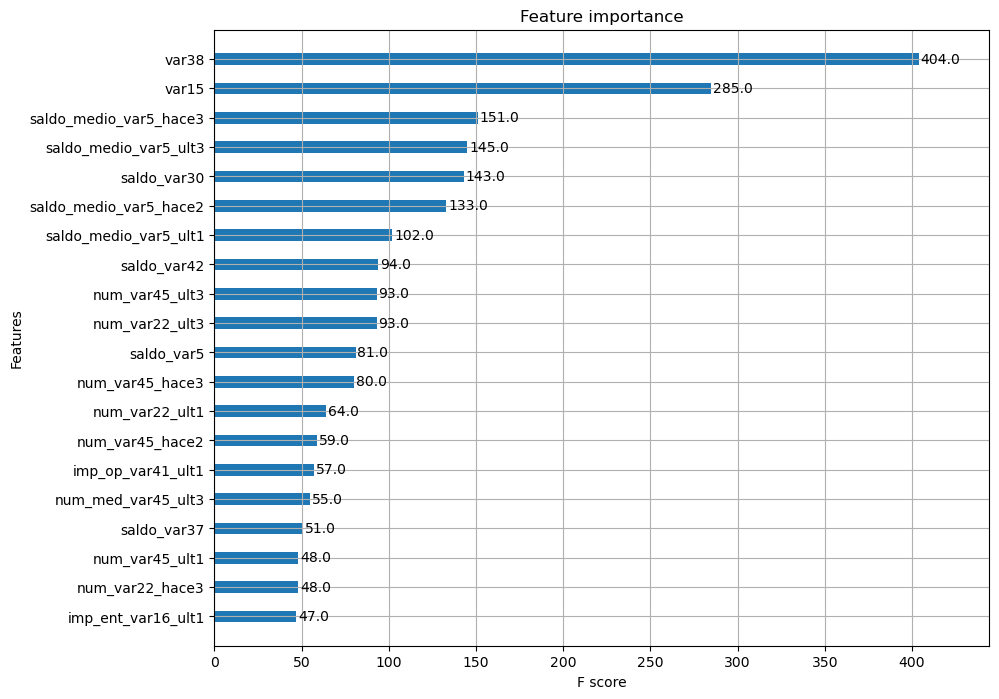

In [34]:
fig, ax = plt.subplots(figsize = (10,8))

plot_importance(xgb_clf, ax = ax, max_num_features = 20, height = 0.4)

In [37]:
lgbm_wrapper = LGBMClassifier(n_estimators = 400, learning_rate = 0.05)

evals = [(X_tr, y_tr), (X_val, y_val)]

lgbm_wrapper.fit(X_tr, y_tr, early_stopping_rounds = 50, eval_metric = "logloss", eval_set=evals, verbose = True)
pred_proba = lgbm_wrapper.predict_proba(X_test)
print(round(roc_auc_score(y_test, pred_proba[:, 1]),4))

[1]	training's binary_logloss: 0.160582	valid_1's binary_logloss: 0.159606
[2]	training's binary_logloss: 0.156901	valid_1's binary_logloss: 0.156579
[3]	training's binary_logloss: 0.153813	valid_1's binary_logloss: 0.154041
[4]	training's binary_logloss: 0.151223	valid_1's binary_logloss: 0.151986
[5]	training's binary_logloss: 0.148987	valid_1's binary_logloss: 0.15021
[6]	training's binary_logloss: 0.147011	valid_1's binary_logloss: 0.148676
[7]	training's binary_logloss: 0.145268	valid_1's binary_logloss: 0.147367
[8]	training's binary_logloss: 0.14365	valid_1's binary_logloss: 0.146198
[9]	training's binary_logloss: 0.142252	valid_1's binary_logloss: 0.145187
[10]	training's binary_logloss: 0.140947	valid_1's binary_logloss: 0.144246
[11]	training's binary_logloss: 0.139721	valid_1's binary_logloss: 0.143308
[12]	training's binary_logloss: 0.138593	valid_1's binary_logloss: 0.142457
[13]	training's binary_logloss: 0.137568	valid_1's binary_logloss: 0.141789
[14]	training's binary_

[125]	training's binary_logloss: 0.108355	valid_1's binary_logloss: 0.133872
[126]	training's binary_logloss: 0.108241	valid_1's binary_logloss: 0.13388
[127]	training's binary_logloss: 0.108084	valid_1's binary_logloss: 0.133892
[128]	training's binary_logloss: 0.10799	valid_1's binary_logloss: 0.133912
[129]	training's binary_logloss: 0.107921	valid_1's binary_logloss: 0.133928
0.84


In [47]:
def objective(params):
    model = LGBMClassifier(**params)
    model.fit(X_tr, y_tr, early_stopping_rounds = 30, eval_metric = "auc", eval_set = [(X_tr, y_tr), (X_val, y_val)])
    score = roc_auc_score(y_val, model.predict_proba(X_val)[:,1])
    return score
    

In [41]:
space = {
    'max_depth': hp.choice('max_depth', range(5, 21)),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    "min_child_weight" : hp.quniform("min_child_weight", 1, 2, 1),
    "colsample_bytree" : hp.uniform("colsample_bytree", 0.5, 1),
}

In [48]:
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

[1]	training's auc: 0.830532	training's binary_logloss: 0.163979	valid_1's auc: 0.809458	valid_1's binary_logloss: 0.162335
[2]	training's auc: 0.833474	training's binary_logloss: 0.162711	valid_1's auc: 0.816504	valid_1's binary_logloss: 0.161179
[3]	training's auc: 0.834164	training's binary_logloss: 0.161485	valid_1's auc: 0.815217	valid_1's binary_logloss: 0.160079
[4]	training's auc: 0.838661	training's binary_logloss: 0.160341	valid_1's auc: 0.821339	valid_1's binary_logloss: 0.159038
[5]	training's auc: 0.838398	training's binary_logloss: 0.159276	valid_1's auc: 0.821932	valid_1's binary_logloss: 0.158074
[6]	training's auc: 0.8395	training's binary_logloss: 0.158273	valid_1's auc: 0.821669	valid_1's binary_logloss: 0.157204
[7]	training's auc: 0.840002	training's binary_logloss: 0.157347	valid_1's auc: 0.822527	valid_1's binary_logloss: 0.15638
[8]	training's auc: 0.843781	training's binary_logloss: 0.156727	valid_1's auc: 0.827414	valid_1's binary_logloss: 0.155866
[9]	trainin

[66]	training's auc: 0.859413	training's binary_logloss: 0.135023	valid_1's auc: 0.838491	valid_1's binary_logloss: 0.137606
[67]	training's auc: 0.859618	training's binary_logloss: 0.134844	valid_1's auc: 0.838464	valid_1's binary_logloss: 0.137488
[68]	training's auc: 0.859762	training's binary_logloss: 0.134671	valid_1's auc: 0.838495	valid_1's binary_logloss: 0.13737
[69]	training's auc: 0.860066	training's binary_logloss: 0.134492	valid_1's auc: 0.838482	valid_1's binary_logloss: 0.13726
[70]	training's auc: 0.860215	training's binary_logloss: 0.134331	valid_1's auc: 0.838477	valid_1's binary_logloss: 0.13715
[71]	training's auc: 0.860345	training's binary_logloss: 0.134171	valid_1's auc: 0.838533	valid_1's binary_logloss: 0.137038
[72]	training's auc: 0.860708	training's binary_logloss: 0.134001	valid_1's auc: 0.838469	valid_1's binary_logloss: 0.136929
[73]	training's auc: 0.860817	training's binary_logloss: 0.133847	valid_1's auc: 0.83849	valid_1's binary_logloss: 0.136818
[74]

[31]	training's auc: 0.878846	training's binary_logloss: 0.124154	valid_1's auc: 0.838441	valid_1's binary_logloss: 0.133008
[32]	training's auc: 0.879564	training's binary_logloss: 0.123925	valid_1's auc: 0.838401	valid_1's binary_logloss: 0.132979
[33]	training's auc: 0.880271	training's binary_logloss: 0.123643	valid_1's auc: 0.838254	valid_1's binary_logloss: 0.132972
[34]	training's auc: 0.881204	training's binary_logloss: 0.123314	valid_1's auc: 0.837681	valid_1's binary_logloss: 0.133023
[35]	training's auc: 0.88194	training's binary_logloss: 0.123099	valid_1's auc: 0.837786	valid_1's binary_logloss: 0.133028
[36]	training's auc: 0.882418	training's binary_logloss: 0.122893	valid_1's auc: 0.837775	valid_1's binary_logloss: 0.132979
[37]	training's auc: 0.882844	training's binary_logloss: 0.122713	valid_1's auc: 0.837483	valid_1's binary_logloss: 0.133041
[38]	training's auc: 0.882998	training's binary_logloss: 0.122649	valid_1's auc: 0.837416	valid_1's binary_logloss: 0.133049
[

[36]	training's auc: 0.876947	training's binary_logloss: 0.12605	valid_1's auc: 0.837661	valid_1's binary_logloss: 0.134771
[37]	training's auc: 0.877744	training's binary_logloss: 0.125741	valid_1's auc: 0.83759	valid_1's binary_logloss: 0.134726
[38]	training's auc: 0.878288	training's binary_logloss: 0.125481	valid_1's auc: 0.837682	valid_1's binary_logloss: 0.134656
[39]	training's auc: 0.879221	training's binary_logloss: 0.125126	valid_1's auc: 0.83782	valid_1's binary_logloss: 0.134492
[40]	training's auc: 0.879801	training's binary_logloss: 0.124799	valid_1's auc: 0.837741	valid_1's binary_logloss: 0.134378
[41]	training's auc: 0.88052	training's binary_logloss: 0.124516	valid_1's auc: 0.837777	valid_1's binary_logloss: 0.134268
[42]	training's auc: 0.881055	training's binary_logloss: 0.124247	valid_1's auc: 0.83775	valid_1's binary_logloss: 0.134173
[43]	training's auc: 0.881561	training's binary_logloss: 0.124022	valid_1's auc: 0.837714	valid_1's binary_logloss: 0.134142
[44]	

[20]	training's auc: 0.872165	training's binary_logloss: 0.128076	valid_1's auc: 0.835954	valid_1's binary_logloss: 0.135976
[21]	training's auc: 0.874117	training's binary_logloss: 0.127387	valid_1's auc: 0.836021	valid_1's binary_logloss: 0.135661
[22]	training's auc: 0.875579	training's binary_logloss: 0.126771	valid_1's auc: 0.836338	valid_1's binary_logloss: 0.135317
[23]	training's auc: 0.876634	training's binary_logloss: 0.12623	valid_1's auc: 0.836546	valid_1's binary_logloss: 0.135047
[24]	training's auc: 0.877769	training's binary_logloss: 0.125754	valid_1's auc: 0.836704	valid_1's binary_logloss: 0.134952
[25]	training's auc: 0.878386	training's binary_logloss: 0.125391	valid_1's auc: 0.836539	valid_1's binary_logloss: 0.134869
[26]	training's auc: 0.878959	training's binary_logloss: 0.12505	valid_1's auc: 0.836465	valid_1's binary_logloss: 0.134792
[27]	training's auc: 0.87953	training's binary_logloss: 0.124564	valid_1's auc: 0.836283	valid_1's binary_logloss: 0.134653
[28

[23]	training's auc: 0.868095	training's binary_logloss: 0.130643	valid_1's auc: 0.836468	valid_1's binary_logloss: 0.13669
[24]	training's auc: 0.869176	training's binary_logloss: 0.130194	valid_1's auc: 0.836357	valid_1's binary_logloss: 0.136457
[25]	training's auc: 0.869589	training's binary_logloss: 0.12982	valid_1's auc: 0.836552	valid_1's binary_logloss: 0.136263
[26]	training's auc: 0.870455	training's binary_logloss: 0.129402	valid_1's auc: 0.836568	valid_1's binary_logloss: 0.136099
[27]	training's auc: 0.871144	training's binary_logloss: 0.128935	valid_1's auc: 0.836869	valid_1's binary_logloss: 0.135788
[28]	training's auc: 0.871615	training's binary_logloss: 0.128463	valid_1's auc: 0.837445	valid_1's binary_logloss: 0.135522
[29]	training's auc: 0.872416	training's binary_logloss: 0.128115	valid_1's auc: 0.837667	valid_1's binary_logloss: 0.135414
[30]	training's auc: 0.873797	training's binary_logloss: 0.127608	valid_1's auc: 0.837914	valid_1's binary_logloss: 0.135187
[3

[15]	training's auc: 0.873598	training's binary_logloss: 0.125697	valid_1's auc: 0.836872	valid_1's binary_logloss: 0.134948
[16]	training's auc: 0.875163	training's binary_logloss: 0.125085	valid_1's auc: 0.83726	valid_1's binary_logloss: 0.134764
[17]	training's auc: 0.876397	training's binary_logloss: 0.124379	valid_1's auc: 0.837765	valid_1's binary_logloss: 0.134455
[18]	training's auc: 0.877808	training's binary_logloss: 0.123685	valid_1's auc: 0.837728	valid_1's binary_logloss: 0.13422
[19]	training's auc: 0.878857	training's binary_logloss: 0.123247	valid_1's auc: 0.837306	valid_1's binary_logloss: 0.134187
[20]	training's auc: 0.880208	training's binary_logloss: 0.122672	valid_1's auc: 0.837011	valid_1's binary_logloss: 0.134051
[21]	training's auc: 0.881643	training's binary_logloss: 0.122141	valid_1's auc: 0.83675	valid_1's binary_logloss: 0.133958
[22]	training's auc: 0.883302	training's binary_logloss: 0.121594	valid_1's auc: 0.836827	valid_1's binary_logloss: 0.13384
[23]

[33]	training's auc: 0.906634	training's binary_logloss: 0.112869	valid_1's auc: 0.827516	valid_1's binary_logloss: 0.13568
[34]	training's auc: 0.907678	training's binary_logloss: 0.112447	valid_1's auc: 0.826967	valid_1's binary_logloss: 0.135859
[35]	training's auc: 0.908458	training's binary_logloss: 0.112037	valid_1's auc: 0.827191	valid_1's binary_logloss: 0.135842
[36]	training's auc: 0.909068	training's binary_logloss: 0.11164	valid_1's auc: 0.826898	valid_1's binary_logloss: 0.135793
[37]	training's auc: 0.909935	training's binary_logloss: 0.111224	valid_1's auc: 0.826366	valid_1's binary_logloss: 0.13589
[38]	training's auc: 0.910867	training's binary_logloss: 0.110812	valid_1's auc: 0.825621	valid_1's binary_logloss: 0.136052
[39]	training's auc: 0.911977	training's binary_logloss: 0.110476	valid_1's auc: 0.825997	valid_1's binary_logloss: 0.136012
[40]	training's auc: 0.912996	training's binary_logloss: 0.110029	valid_1's auc: 0.825769	valid_1's binary_logloss: 0.136152
[41

[51]	training's auc: 0.885728	training's binary_logloss: 0.121873	valid_1's auc: 0.83904	valid_1's binary_logloss: 0.13342
[52]	training's auc: 0.886285	training's binary_logloss: 0.121648	valid_1's auc: 0.839203	valid_1's binary_logloss: 0.133333
[53]	training's auc: 0.886627	training's binary_logloss: 0.121443	valid_1's auc: 0.838985	valid_1's binary_logloss: 0.133306
[54]	training's auc: 0.887087	training's binary_logloss: 0.121236	valid_1's auc: 0.838894	valid_1's binary_logloss: 0.133255
[55]	training's auc: 0.887601	training's binary_logloss: 0.121052	valid_1's auc: 0.83881	valid_1's binary_logloss: 0.133249
[56]	training's auc: 0.887984	training's binary_logloss: 0.120899	valid_1's auc: 0.838907	valid_1's binary_logloss: 0.133183
[57]	training's auc: 0.888563	training's binary_logloss: 0.120681	valid_1's auc: 0.838572	valid_1's binary_logloss: 0.13321
[58]	training's auc: 0.888868	training's binary_logloss: 0.12052	valid_1's auc: 0.838579	valid_1's binary_logloss: 0.133172
[59]	

[40]	training's auc: 0.883069	training's binary_logloss: 0.123219	valid_1's auc: 0.837589	valid_1's binary_logloss: 0.133952
[41]	training's auc: 0.883934	training's binary_logloss: 0.122909	valid_1's auc: 0.837599	valid_1's binary_logloss: 0.133878
[42]	training's auc: 0.884586	training's binary_logloss: 0.122668	valid_1's auc: 0.837654	valid_1's binary_logloss: 0.133791
[43]	training's auc: 0.885086	training's binary_logloss: 0.122394	valid_1's auc: 0.83791	valid_1's binary_logloss: 0.133692
[44]	training's auc: 0.885481	training's binary_logloss: 0.122168	valid_1's auc: 0.837745	valid_1's binary_logloss: 0.133609
[45]	training's auc: 0.886224	training's binary_logloss: 0.121932	valid_1's auc: 0.837884	valid_1's binary_logloss: 0.133549
[46]	training's auc: 0.886783	training's binary_logloss: 0.121691	valid_1's auc: 0.837762	valid_1's binary_logloss: 0.133512
[47]	training's auc: 0.887152	training's binary_logloss: 0.121478	valid_1's auc: 0.83772	valid_1's binary_logloss: 0.133506
[4

[32]	training's auc: 0.851886	training's binary_logloss: 0.143511	valid_1's auc: 0.831751	valid_1's binary_logloss: 0.145713
[33]	training's auc: 0.852528	training's binary_logloss: 0.143209	valid_1's auc: 0.831897	valid_1's binary_logloss: 0.145494
[34]	training's auc: 0.852367	training's binary_logloss: 0.142918	valid_1's auc: 0.831698	valid_1's binary_logloss: 0.145278
[35]	training's auc: 0.852353	training's binary_logloss: 0.142629	valid_1's auc: 0.831862	valid_1's binary_logloss: 0.145073
[36]	training's auc: 0.853216	training's binary_logloss: 0.142211	valid_1's auc: 0.832131	valid_1's binary_logloss: 0.144752
[37]	training's auc: 0.852989	training's binary_logloss: 0.141942	valid_1's auc: 0.83208	valid_1's binary_logloss: 0.144569
[38]	training's auc: 0.852955	training's binary_logloss: 0.141699	valid_1's auc: 0.831807	valid_1's binary_logloss: 0.144414
[39]	training's auc: 0.853699	training's binary_logloss: 0.141301	valid_1's auc: 0.832762	valid_1's binary_logloss: 0.144093
[

[97]	training's auc: 0.873082	training's binary_logloss: 0.128981	valid_1's auc: 0.838224	valid_1's binary_logloss: 0.136075
[98]	training's auc: 0.873184	training's binary_logloss: 0.12887	valid_1's auc: 0.838197	valid_1's binary_logloss: 0.136032
[99]	training's auc: 0.873591	training's binary_logloss: 0.128719	valid_1's auc: 0.838341	valid_1's binary_logloss: 0.135967
[100]	training's auc: 0.873763	training's binary_logloss: 0.128617	valid_1's auc: 0.838287	valid_1's binary_logloss: 0.135946
[1]	training's auc: 0.750294	training's binary_logloss: 0.158445	valid_1's auc: 0.712754	valid_1's binary_logloss: 0.15792
[2]	training's auc: 0.827569	training's binary_logloss: 0.15059	valid_1's auc: 0.802326	valid_1's binary_logloss: 0.150907
[3]	training's auc: 0.841283	training's binary_logloss: 0.145529	valid_1's auc: 0.820846	valid_1's binary_logloss: 0.146463
[4]	training's auc: 0.84893	training's binary_logloss: 0.141877	valid_1's auc: 0.830646	valid_1's binary_logloss: 0.143208
[5]	tra

[11]	training's auc: 0.867968	training's binary_logloss: 0.12918	valid_1's auc: 0.8369	valid_1's binary_logloss: 0.136856
[12]	training's auc: 0.87154	training's binary_logloss: 0.127801	valid_1's auc: 0.837488	valid_1's binary_logloss: 0.13603
[13]	training's auc: 0.873894	training's binary_logloss: 0.126611	valid_1's auc: 0.836977	valid_1's binary_logloss: 0.135614
[14]	training's auc: 0.876144	training's binary_logloss: 0.125539	valid_1's auc: 0.837123	valid_1's binary_logloss: 0.135266
[15]	training's auc: 0.877854	training's binary_logloss: 0.124831	valid_1's auc: 0.837172	valid_1's binary_logloss: 0.135163
[16]	training's auc: 0.879458	training's binary_logloss: 0.124128	valid_1's auc: 0.837809	valid_1's binary_logloss: 0.134957
[17]	training's auc: 0.88119	training's binary_logloss: 0.123251	valid_1's auc: 0.838135	valid_1's binary_logloss: 0.134597
[18]	training's auc: 0.883184	training's binary_logloss: 0.122512	valid_1's auc: 0.839186	valid_1's binary_logloss: 0.134161
[19]	t

[27]	training's auc: 0.851623	training's binary_logloss: 0.143934	valid_1's auc: 0.832569	valid_1's binary_logloss: 0.146017
[28]	training's auc: 0.851791	training's binary_logloss: 0.143475	valid_1's auc: 0.83257	valid_1's binary_logloss: 0.145643
[29]	training's auc: 0.852236	training's binary_logloss: 0.143143	valid_1's auc: 0.832794	valid_1's binary_logloss: 0.145418
[30]	training's auc: 0.852699	training's binary_logloss: 0.142701	valid_1's auc: 0.833102	valid_1's binary_logloss: 0.145058
[31]	training's auc: 0.853579	training's binary_logloss: 0.142243	valid_1's auc: 0.833071	valid_1's binary_logloss: 0.144737
[32]	training's auc: 0.854041	training's binary_logloss: 0.141825	valid_1's auc: 0.832924	valid_1's binary_logloss: 0.144424
[33]	training's auc: 0.854462	training's binary_logloss: 0.141532	valid_1's auc: 0.833869	valid_1's binary_logloss: 0.144183
[34]	training's auc: 0.854737	training's binary_logloss: 0.14113	valid_1's auc: 0.833561	valid_1's binary_logloss: 0.14391
[35

[92]	training's auc: 0.873698	training's binary_logloss: 0.128189	valid_1's auc: 0.838188	valid_1's binary_logloss: 0.135537
[93]	training's auc: 0.873917	training's binary_logloss: 0.128046	valid_1's auc: 0.838386	valid_1's binary_logloss: 0.135455
[94]	training's auc: 0.874136	training's binary_logloss: 0.127933	valid_1's auc: 0.838573	valid_1's binary_logloss: 0.135404
[95]	training's auc: 0.874313	training's binary_logloss: 0.127798	valid_1's auc: 0.838565	valid_1's binary_logloss: 0.135338
[96]	training's auc: 0.874491	training's binary_logloss: 0.127664	valid_1's auc: 0.838566	valid_1's binary_logloss: 0.135264
[97]	training's auc: 0.874663	training's binary_logloss: 0.127535	valid_1's auc: 0.838584	valid_1's binary_logloss: 0.135201
[98]	training's auc: 0.874865	training's binary_logloss: 0.127422	valid_1's auc: 0.838668	valid_1's binary_logloss: 0.13516
[99]	training's auc: 0.875109	training's binary_logloss: 0.1273	valid_1's auc: 0.838546	valid_1's binary_logloss: 0.135111
[10

[11]	training's auc: 0.871332	training's binary_logloss: 0.12754	valid_1's auc: 0.834777	valid_1's binary_logloss: 0.136192
[12]	training's auc: 0.874204	training's binary_logloss: 0.126557	valid_1's auc: 0.835657	valid_1's binary_logloss: 0.13568
[13]	training's auc: 0.875258	training's binary_logloss: 0.12568	valid_1's auc: 0.835115	valid_1's binary_logloss: 0.135373
[14]	training's auc: 0.876395	training's binary_logloss: 0.124894	valid_1's auc: 0.835337	valid_1's binary_logloss: 0.1351
[15]	training's auc: 0.87781	training's binary_logloss: 0.124164	valid_1's auc: 0.835184	valid_1's binary_logloss: 0.134834
[16]	training's auc: 0.879957	training's binary_logloss: 0.123348	valid_1's auc: 0.835477	valid_1's binary_logloss: 0.134575
[17]	training's auc: 0.881491	training's binary_logloss: 0.122732	valid_1's auc: 0.835129	valid_1's binary_logloss: 0.134487
[18]	training's auc: 0.882924	training's binary_logloss: 0.122194	valid_1's auc: 0.835606	valid_1's binary_logloss: 0.134307
[19]	t

[21]	training's auc: 0.864813	training's binary_logloss: 0.134629	valid_1's auc: 0.835212	valid_1's binary_logloss: 0.139779
[22]	training's auc: 0.86546	training's binary_logloss: 0.133939	valid_1's auc: 0.835445	valid_1's binary_logloss: 0.139351
[23]	training's auc: 0.866685	training's binary_logloss: 0.133347	valid_1's auc: 0.835303	valid_1's binary_logloss: 0.138995
[24]	training's auc: 0.867063	training's binary_logloss: 0.132883	valid_1's auc: 0.835816	valid_1's binary_logloss: 0.138708
[25]	training's auc: 0.867292	training's binary_logloss: 0.132456	valid_1's auc: 0.835956	valid_1's binary_logloss: 0.138497
[26]	training's auc: 0.867708	training's binary_logloss: 0.132039	valid_1's auc: 0.835547	valid_1's binary_logloss: 0.138299
[27]	training's auc: 0.86906	training's binary_logloss: 0.131465	valid_1's auc: 0.835781	valid_1's binary_logloss: 0.137969
[28]	training's auc: 0.869895	training's binary_logloss: 0.130927	valid_1's auc: 0.835927	valid_1's binary_logloss: 0.137636
[2

[10]	training's auc: 0.873035	training's binary_logloss: 0.127627	valid_1's auc: 0.833307	valid_1's binary_logloss: 0.136647
[11]	training's auc: 0.87541	training's binary_logloss: 0.126417	valid_1's auc: 0.834178	valid_1's binary_logloss: 0.135909
[12]	training's auc: 0.877793	training's binary_logloss: 0.125256	valid_1's auc: 0.832782	valid_1's binary_logloss: 0.1356
[13]	training's auc: 0.879569	training's binary_logloss: 0.124258	valid_1's auc: 0.833993	valid_1's binary_logloss: 0.135162
[14]	training's auc: 0.881562	training's binary_logloss: 0.123328	valid_1's auc: 0.834341	valid_1's binary_logloss: 0.134815
[15]	training's auc: 0.883162	training's binary_logloss: 0.122477	valid_1's auc: 0.834479	valid_1's binary_logloss: 0.134532
[16]	training's auc: 0.884899	training's binary_logloss: 0.121736	valid_1's auc: 0.835334	valid_1's binary_logloss: 0.134322
[17]	training's auc: 0.886645	training's binary_logloss: 0.121112	valid_1's auc: 0.835392	valid_1's binary_logloss: 0.134125
[18

[26]	training's auc: 0.850837	training's binary_logloss: 0.146362	valid_1's auc: 0.830911	valid_1's binary_logloss: 0.147685
[27]	training's auc: 0.851127	training's binary_logloss: 0.145919	valid_1's auc: 0.831245	valid_1's binary_logloss: 0.147333
[28]	training's auc: 0.851332	training's binary_logloss: 0.145492	valid_1's auc: 0.831479	valid_1's binary_logloss: 0.146982
[29]	training's auc: 0.851636	training's binary_logloss: 0.145177	valid_1's auc: 0.830969	valid_1's binary_logloss: 0.146737
[30]	training's auc: 0.852308	training's binary_logloss: 0.144766	valid_1's auc: 0.831272	valid_1's binary_logloss: 0.146412
[31]	training's auc: 0.853092	training's binary_logloss: 0.144364	valid_1's auc: 0.832049	valid_1's binary_logloss: 0.146106
[32]	training's auc: 0.853245	training's binary_logloss: 0.143969	valid_1's auc: 0.832117	valid_1's binary_logloss: 0.145803
[33]	training's auc: 0.853682	training's binary_logloss: 0.143587	valid_1's auc: 0.832381	valid_1's binary_logloss: 0.145502


[91]	training's auc: 0.866468	training's binary_logloss: 0.130995	valid_1's auc: 0.836442	valid_1's binary_logloss: 0.136601
[92]	training's auc: 0.866618	training's binary_logloss: 0.130874	valid_1's auc: 0.836536	valid_1's binary_logloss: 0.136527
[93]	training's auc: 0.866767	training's binary_logloss: 0.130759	valid_1's auc: 0.836559	valid_1's binary_logloss: 0.136443
[94]	training's auc: 0.866931	training's binary_logloss: 0.130632	valid_1's auc: 0.836652	valid_1's binary_logloss: 0.136362
[95]	training's auc: 0.867171	training's binary_logloss: 0.130525	valid_1's auc: 0.836749	valid_1's binary_logloss: 0.136285
[96]	training's auc: 0.86729	training's binary_logloss: 0.130403	valid_1's auc: 0.836708	valid_1's binary_logloss: 0.136221
[97]	training's auc: 0.867419	training's binary_logloss: 0.130295	valid_1's auc: 0.836718	valid_1's binary_logloss: 0.136151
[98]	training's auc: 0.867513	training's binary_logloss: 0.130178	valid_1's auc: 0.836707	valid_1's binary_logloss: 0.13609
[9

[56]	training's auc: 0.898435	training's binary_logloss: 0.116106	valid_1's auc: 0.831774	valid_1's binary_logloss: 0.134506
[57]	training's auc: 0.898564	training's binary_logloss: 0.116056	valid_1's auc: 0.831854	valid_1's binary_logloss: 0.134501
[1]	training's auc: 0.760916	training's binary_logloss: 0.157814	valid_1's auc: 0.731604	valid_1's binary_logloss: 0.158042
[2]	training's auc: 0.833859	training's binary_logloss: 0.149704	valid_1's auc: 0.814927	valid_1's binary_logloss: 0.151187
[3]	training's auc: 0.842901	training's binary_logloss: 0.144642	valid_1's auc: 0.823715	valid_1's binary_logloss: 0.147069
[4]	training's auc: 0.852014	training's binary_logloss: 0.14075	valid_1's auc: 0.827506	valid_1's binary_logloss: 0.144354
[5]	training's auc: 0.858701	training's binary_logloss: 0.137746	valid_1's auc: 0.831476	valid_1's binary_logloss: 0.142359
[6]	training's auc: 0.858904	training's binary_logloss: 0.136113	valid_1's auc: 0.829823	valid_1's binary_logloss: 0.141517
[7]	tra

[17]	training's auc: 0.892035	training's binary_logloss: 0.118678	valid_1's auc: 0.833275	valid_1's binary_logloss: 0.134797
[18]	training's auc: 0.893859	training's binary_logloss: 0.117917	valid_1's auc: 0.832816	valid_1's binary_logloss: 0.134783
[19]	training's auc: 0.895082	training's binary_logloss: 0.117293	valid_1's auc: 0.831395	valid_1's binary_logloss: 0.135018
[20]	training's auc: 0.896293	training's binary_logloss: 0.116695	valid_1's auc: 0.831547	valid_1's binary_logloss: 0.134996
[21]	training's auc: 0.897585	training's binary_logloss: 0.116092	valid_1's auc: 0.831068	valid_1's binary_logloss: 0.13511
[22]	training's auc: 0.898212	training's binary_logloss: 0.11588	valid_1's auc: 0.830907	valid_1's binary_logloss: 0.135135
[23]	training's auc: 0.899486	training's binary_logloss: 0.115359	valid_1's auc: 0.830149	valid_1's binary_logloss: 0.13531
[24]	training's auc: 0.901069	training's binary_logloss: 0.114728	valid_1's auc: 0.830303	valid_1's binary_logloss: 0.135268
[25

[36]	training's auc: 0.912192	training's binary_logloss: 0.109677	valid_1's auc: 0.827443	valid_1's binary_logloss: 0.135879
[37]	training's auc: 0.912463	training's binary_logloss: 0.109544	valid_1's auc: 0.827164	valid_1's binary_logloss: 0.135914
[38]	training's auc: 0.912656	training's binary_logloss: 0.109426	valid_1's auc: 0.826898	valid_1's binary_logloss: 0.135977
[39]	training's auc: 0.913837	training's binary_logloss: 0.108871	valid_1's auc: 0.82627	valid_1's binary_logloss: 0.136174
[40]	training's auc: 0.914385	training's binary_logloss: 0.108536	valid_1's auc: 0.826291	valid_1's binary_logloss: 0.136167
[41]	training's auc: 0.915224	training's binary_logloss: 0.108082	valid_1's auc: 0.825982	valid_1's binary_logloss: 0.136321
[42]	training's auc: 0.915858	training's binary_logloss: 0.10776	valid_1's auc: 0.825593	valid_1's binary_logloss: 0.136392
[1]	training's auc: 0.82448	training's binary_logloss: 0.148333	valid_1's auc: 0.816386	valid_1's binary_logloss: 0.149742
[2]	

[19]	training's auc: 0.892362	training's binary_logloss: 0.118284	valid_1's auc: 0.83149	valid_1's binary_logloss: 0.134788
[20]	training's auc: 0.894146	training's binary_logloss: 0.117743	valid_1's auc: 0.83085	valid_1's binary_logloss: 0.134829
[21]	training's auc: 0.896577	training's binary_logloss: 0.117042	valid_1's auc: 0.831398	valid_1's binary_logloss: 0.134706
[22]	training's auc: 0.897996	training's binary_logloss: 0.116504	valid_1's auc: 0.831692	valid_1's binary_logloss: 0.134714
[23]	training's auc: 0.899681	training's binary_logloss: 0.115941	valid_1's auc: 0.831688	valid_1's binary_logloss: 0.134686
[24]	training's auc: 0.901021	training's binary_logloss: 0.115465	valid_1's auc: 0.831424	valid_1's binary_logloss: 0.134707
[25]	training's auc: 0.902184	training's binary_logloss: 0.114939	valid_1's auc: 0.831513	valid_1's binary_logloss: 0.13472
[26]	training's auc: 0.903097	training's binary_logloss: 0.114495	valid_1's auc: 0.830587	valid_1's binary_logloss: 0.134865
[27

[1]	training's auc: 0.76309	training's binary_logloss: 0.15613	valid_1's auc: 0.742658	valid_1's binary_logloss: 0.156966
[2]	training's auc: 0.830888	training's binary_logloss: 0.147119	valid_1's auc: 0.816647	valid_1's binary_logloss: 0.149625
[3]	training's auc: 0.841506	training's binary_logloss: 0.141649	valid_1's auc: 0.824645	valid_1's binary_logloss: 0.145535
[4]	training's auc: 0.851732	training's binary_logloss: 0.137802	valid_1's auc: 0.826039	valid_1's binary_logloss: 0.142966
[5]	training's auc: 0.859259	training's binary_logloss: 0.134869	valid_1's auc: 0.831043	valid_1's binary_logloss: 0.140785
[6]	training's auc: 0.861725	training's binary_logloss: 0.132538	valid_1's auc: 0.83155	valid_1's binary_logloss: 0.139343
[7]	training's auc: 0.865305	training's binary_logloss: 0.130558	valid_1's auc: 0.83087	valid_1's binary_logloss: 0.138436
[8]	training's auc: 0.868338	training's binary_logloss: 0.129116	valid_1's auc: 0.832587	valid_1's binary_logloss: 0.137706
[9]	training

[21]	training's auc: 0.87322	training's binary_logloss: 0.126854	valid_1's auc: 0.838519	valid_1's binary_logloss: 0.134607
[22]	training's auc: 0.873929	training's binary_logloss: 0.126336	valid_1's auc: 0.838528	valid_1's binary_logloss: 0.134368
[23]	training's auc: 0.875709	training's binary_logloss: 0.125827	valid_1's auc: 0.838468	valid_1's binary_logloss: 0.134212
[24]	training's auc: 0.876893	training's binary_logloss: 0.1254	valid_1's auc: 0.838483	valid_1's binary_logloss: 0.134141
[25]	training's auc: 0.878071	training's binary_logloss: 0.124955	valid_1's auc: 0.838455	valid_1's binary_logloss: 0.133993
[26]	training's auc: 0.879317	training's binary_logloss: 0.124481	valid_1's auc: 0.838366	valid_1's binary_logloss: 0.133903
[27]	training's auc: 0.879812	training's binary_logloss: 0.124131	valid_1's auc: 0.838324	valid_1's binary_logloss: 0.133802
[28]	training's auc: 0.880844	training's binary_logloss: 0.123758	valid_1's auc: 0.838563	valid_1's binary_logloss: 0.133649
[29

[24]	training's auc: 0.901921	training's binary_logloss: 0.114808	valid_1's auc: 0.829924	valid_1's binary_logloss: 0.135152
[25]	training's auc: 0.902825	training's binary_logloss: 0.114316	valid_1's auc: 0.829638	valid_1's binary_logloss: 0.135194
[26]	training's auc: 0.904267	training's binary_logloss: 0.113699	valid_1's auc: 0.829846	valid_1's binary_logloss: 0.13523
[27]	training's auc: 0.905068	training's binary_logloss: 0.113256	valid_1's auc: 0.829635	valid_1's binary_logloss: 0.135296
[28]	training's auc: 0.907256	training's binary_logloss: 0.112595	valid_1's auc: 0.829638	valid_1's binary_logloss: 0.135362
[29]	training's auc: 0.908003	training's binary_logloss: 0.112244	valid_1's auc: 0.829393	valid_1's binary_logloss: 0.135381
[30]	training's auc: 0.909237	training's binary_logloss: 0.111752	valid_1's auc: 0.829213	valid_1's binary_logloss: 0.135404
[31]	training's auc: 0.910181	training's binary_logloss: 0.111309	valid_1's auc: 0.828651	valid_1's binary_logloss: 0.135474
[

[2]	training's auc: 0.835266	training's binary_logloss: 0.145383	valid_1's auc: 0.822361	valid_1's binary_logloss: 0.147342
[3]	training's auc: 0.842207	training's binary_logloss: 0.141008	valid_1's auc: 0.824337	valid_1's binary_logloss: 0.144087
[4]	training's auc: 0.847834	training's binary_logloss: 0.137642	valid_1's auc: 0.828253	valid_1's binary_logloss: 0.141605
[5]	training's auc: 0.853226	training's binary_logloss: 0.135039	valid_1's auc: 0.830729	valid_1's binary_logloss: 0.13979
[6]	training's auc: 0.857992	training's binary_logloss: 0.132834	valid_1's auc: 0.831774	valid_1's binary_logloss: 0.138431
[7]	training's auc: 0.861928	training's binary_logloss: 0.131013	valid_1's auc: 0.831459	valid_1's binary_logloss: 0.137633
[8]	training's auc: 0.865725	training's binary_logloss: 0.129358	valid_1's auc: 0.833636	valid_1's binary_logloss: 0.136734
[9]	training's auc: 0.867427	training's binary_logloss: 0.12802	valid_1's auc: 0.833823	valid_1's binary_logloss: 0.13607
[10]	traini

[15]	training's auc: 0.890008	training's binary_logloss: 0.119012	valid_1's auc: 0.830851	valid_1's binary_logloss: 0.134759
[16]	training's auc: 0.892033	training's binary_logloss: 0.118351	valid_1's auc: 0.830872	valid_1's binary_logloss: 0.134767
[17]	training's auc: 0.894199	training's binary_logloss: 0.117596	valid_1's auc: 0.830808	valid_1's binary_logloss: 0.134724
[18]	training's auc: 0.896341	training's binary_logloss: 0.116767	valid_1's auc: 0.830483	valid_1's binary_logloss: 0.134748
[19]	training's auc: 0.897727	training's binary_logloss: 0.116157	valid_1's auc: 0.830512	valid_1's binary_logloss: 0.134691
[20]	training's auc: 0.899511	training's binary_logloss: 0.115627	valid_1's auc: 0.831014	valid_1's binary_logloss: 0.134647
[21]	training's auc: 0.900865	training's binary_logloss: 0.11515	valid_1's auc: 0.830672	valid_1's binary_logloss: 0.134669
[22]	training's auc: 0.902612	training's binary_logloss: 0.114503	valid_1's auc: 0.831038	valid_1's binary_logloss: 0.134635
[

[45]	training's auc: 0.908459	training's binary_logloss: 0.112258	valid_1's auc: 0.83318	valid_1's binary_logloss: 0.134245
[46]	training's auc: 0.909166	training's binary_logloss: 0.111951	valid_1's auc: 0.832979	valid_1's binary_logloss: 0.134292
[47]	training's auc: 0.909493	training's binary_logloss: 0.111786	valid_1's auc: 0.832949	valid_1's binary_logloss: 0.134325
[48]	training's auc: 0.910466	training's binary_logloss: 0.111471	valid_1's auc: 0.833131	valid_1's binary_logloss: 0.134243
[49]	training's auc: 0.910762	training's binary_logloss: 0.111344	valid_1's auc: 0.83309	valid_1's binary_logloss: 0.134238
[1]	training's auc: 0.756568	training's binary_logloss: 0.155403	valid_1's auc: 0.720056	valid_1's binary_logloss: 0.15661
[2]	training's auc: 0.833962	training's binary_logloss: 0.145894	valid_1's auc: 0.811028	valid_1's binary_logloss: 0.149053
[3]	training's auc: 0.843084	training's binary_logloss: 0.140392	valid_1's auc: 0.821526	valid_1's binary_logloss: 0.144813
[4]	tr

[16]	training's auc: 0.854052	training's binary_logloss: 0.141108	valid_1's auc: 0.831966	valid_1's binary_logloss: 0.144337
[17]	training's auc: 0.855809	training's binary_logloss: 0.140315	valid_1's auc: 0.831989	valid_1's binary_logloss: 0.143748
[18]	training's auc: 0.857206	training's binary_logloss: 0.139513	valid_1's auc: 0.833307	valid_1's binary_logloss: 0.143135
[19]	training's auc: 0.858504	training's binary_logloss: 0.138972	valid_1's auc: 0.833994	valid_1's binary_logloss: 0.142772
[20]	training's auc: 0.859079	training's binary_logloss: 0.138261	valid_1's auc: 0.835373	valid_1's binary_logloss: 0.142207
[21]	training's auc: 0.859615	training's binary_logloss: 0.137604	valid_1's auc: 0.83551	valid_1's binary_logloss: 0.141742
[22]	training's auc: 0.859971	training's binary_logloss: 0.136983	valid_1's auc: 0.835079	valid_1's binary_logloss: 0.141298
[23]	training's auc: 0.860317	training's binary_logloss: 0.136378	valid_1's auc: 0.835458	valid_1's binary_logloss: 0.140824
[

[81]	training's auc: 0.889091	training's binary_logloss: 0.120416	valid_1's auc: 0.838576	valid_1's binary_logloss: 0.133196
[82]	training's auc: 0.889433	training's binary_logloss: 0.120276	valid_1's auc: 0.838515	valid_1's binary_logloss: 0.133162
[83]	training's auc: 0.889704	training's binary_logloss: 0.120142	valid_1's auc: 0.838415	valid_1's binary_logloss: 0.133142
[84]	training's auc: 0.890205	training's binary_logloss: 0.119983	valid_1's auc: 0.838348	valid_1's binary_logloss: 0.133127
[85]	training's auc: 0.890675	training's binary_logloss: 0.119846	valid_1's auc: 0.838385	valid_1's binary_logloss: 0.133087
[86]	training's auc: 0.891062	training's binary_logloss: 0.119714	valid_1's auc: 0.838494	valid_1's binary_logloss: 0.133034
[87]	training's auc: 0.89131	training's binary_logloss: 0.119595	valid_1's auc: 0.838537	valid_1's binary_logloss: 0.133
[88]	training's auc: 0.891601	training's binary_logloss: 0.119464	valid_1's auc: 0.838434	valid_1's binary_logloss: 0.132985
[89]

[46]	training's auc: 0.901046	training's binary_logloss: 0.115782	valid_1's auc: 0.835018	valid_1's binary_logloss: 0.133805
[47]	training's auc: 0.901228	training's binary_logloss: 0.115692	valid_1's auc: 0.835075	valid_1's binary_logloss: 0.133809
[48]	training's auc: 0.901864	training's binary_logloss: 0.11542	valid_1's auc: 0.834908	valid_1's binary_logloss: 0.133812
[49]	training's auc: 0.902346	training's binary_logloss: 0.115173	valid_1's auc: 0.835015	valid_1's binary_logloss: 0.1338
[50]	training's auc: 0.902511	training's binary_logloss: 0.115066	valid_1's auc: 0.835153	valid_1's binary_logloss: 0.133775
[51]	training's auc: 0.902846	training's binary_logloss: 0.114897	valid_1's auc: 0.835159	valid_1's binary_logloss: 0.133786
[52]	training's auc: 0.902992	training's binary_logloss: 0.114827	valid_1's auc: 0.83526	valid_1's binary_logloss: 0.133771
[53]	training's auc: 0.903085	training's binary_logloss: 0.114781	valid_1's auc: 0.835323	valid_1's binary_logloss: 0.133765
[54]

[2]	training's auc: 0.833375	training's binary_logloss: 0.145446	valid_1's auc: 0.818375	valid_1's binary_logloss: 0.147495
[3]	training's auc: 0.844276	training's binary_logloss: 0.140997	valid_1's auc: 0.824494	valid_1's binary_logloss: 0.144216
[4]	training's auc: 0.849065	training's binary_logloss: 0.137665	valid_1's auc: 0.830628	valid_1's binary_logloss: 0.141665
[5]	training's auc: 0.855374	training's binary_logloss: 0.135044	valid_1's auc: 0.832431	valid_1's binary_logloss: 0.139864
[6]	training's auc: 0.85897	training's binary_logloss: 0.133008	valid_1's auc: 0.833886	valid_1's binary_logloss: 0.138388
[7]	training's auc: 0.860866	training's binary_logloss: 0.131205	valid_1's auc: 0.833703	valid_1's binary_logloss: 0.137418
[8]	training's auc: 0.86354	training's binary_logloss: 0.129769	valid_1's auc: 0.83434	valid_1's binary_logloss: 0.136658
[9]	training's auc: 0.867211	training's binary_logloss: 0.128416	valid_1's auc: 0.835122	valid_1's binary_logloss: 0.135987
[10]	traini

[26]	training's auc: 0.87642	training's binary_logloss: 0.125887	valid_1's auc: 0.839216	valid_1's binary_logloss: 0.134264
[27]	training's auc: 0.877119	training's binary_logloss: 0.125483	valid_1's auc: 0.839338	valid_1's binary_logloss: 0.134068
[28]	training's auc: 0.87867	training's binary_logloss: 0.125001	valid_1's auc: 0.83936	valid_1's binary_logloss: 0.133921
[29]	training's auc: 0.879542	training's binary_logloss: 0.124672	valid_1's auc: 0.839292	valid_1's binary_logloss: 0.133894
[30]	training's auc: 0.880571	training's binary_logloss: 0.124307	valid_1's auc: 0.839412	valid_1's binary_logloss: 0.133743
[31]	training's auc: 0.881267	training's binary_logloss: 0.123971	valid_1's auc: 0.839281	valid_1's binary_logloss: 0.133641
[32]	training's auc: 0.881972	training's binary_logloss: 0.123634	valid_1's auc: 0.838987	valid_1's binary_logloss: 0.133558
[33]	training's auc: 0.882775	training's binary_logloss: 0.12333	valid_1's auc: 0.838984	valid_1's binary_logloss: 0.133512
[34]

[17]	training's auc: 0.878316	training's binary_logloss: 0.124576	valid_1's auc: 0.835105	valid_1's binary_logloss: 0.134897
[18]	training's auc: 0.879275	training's binary_logloss: 0.123881	valid_1's auc: 0.835469	valid_1's binary_logloss: 0.134707
[19]	training's auc: 0.880482	training's binary_logloss: 0.123333	valid_1's auc: 0.835616	valid_1's binary_logloss: 0.134595
[20]	training's auc: 0.882606	training's binary_logloss: 0.122727	valid_1's auc: 0.835182	valid_1's binary_logloss: 0.134449
[21]	training's auc: 0.88366	training's binary_logloss: 0.122272	valid_1's auc: 0.834984	valid_1's binary_logloss: 0.134308
[22]	training's auc: 0.884565	training's binary_logloss: 0.121841	valid_1's auc: 0.834578	valid_1's binary_logloss: 0.134216
[23]	training's auc: 0.886046	training's binary_logloss: 0.121316	valid_1's auc: 0.834928	valid_1's binary_logloss: 0.134064
[24]	training's auc: 0.886797	training's binary_logloss: 0.120921	valid_1's auc: 0.8353	valid_1's binary_logloss: 0.134084
[25

[36]	training's auc: 0.891231	training's binary_logloss: 0.119298	valid_1's auc: 0.83785	valid_1's binary_logloss: 0.132911
[37]	training's auc: 0.891772	training's binary_logloss: 0.119096	valid_1's auc: 0.837535	valid_1's binary_logloss: 0.132925
[38]	training's auc: 0.892502	training's binary_logloss: 0.118846	valid_1's auc: 0.837388	valid_1's binary_logloss: 0.132923
[39]	training's auc: 0.893165	training's binary_logloss: 0.1186	valid_1's auc: 0.836565	valid_1's binary_logloss: 0.133005
[40]	training's auc: 0.894279	training's binary_logloss: 0.118311	valid_1's auc: 0.836635	valid_1's binary_logloss: 0.132991
[41]	training's auc: 0.894601	training's binary_logloss: 0.118175	valid_1's auc: 0.836512	valid_1's binary_logloss: 0.132998
[42]	training's auc: 0.894964	training's binary_logloss: 0.118037	valid_1's auc: 0.836346	valid_1's binary_logloss: 0.133018
[43]	training's auc: 0.895469	training's binary_logloss: 0.117806	valid_1's auc: 0.836328	valid_1's binary_logloss: 0.133038
[44

[35]	training's auc: 0.907799	training's binary_logloss: 0.111193	valid_1's auc: 0.829217	valid_1's binary_logloss: 0.135488
[36]	training's auc: 0.909247	training's binary_logloss: 0.110781	valid_1's auc: 0.829068	valid_1's binary_logloss: 0.135505
[37]	training's auc: 0.910321	training's binary_logloss: 0.110292	valid_1's auc: 0.829601	valid_1's binary_logloss: 0.135442
[38]	training's auc: 0.910759	training's binary_logloss: 0.110082	valid_1's auc: 0.829234	valid_1's binary_logloss: 0.135556
[39]	training's auc: 0.911511	training's binary_logloss: 0.109766	valid_1's auc: 0.829831	valid_1's binary_logloss: 0.135457
[40]	training's auc: 0.912176	training's binary_logloss: 0.109409	valid_1's auc: 0.830101	valid_1's binary_logloss: 0.135395
[41]	training's auc: 0.912786	training's binary_logloss: 0.109104	valid_1's auc: 0.830053	valid_1's binary_logloss: 0.135427
[42]	training's auc: 0.913488	training's binary_logloss: 0.108803	valid_1's auc: 0.829542	valid_1's binary_logloss: 0.135501


[52]	training's auc: 0.893302	training's binary_logloss: 0.118556	valid_1's auc: 0.837282	valid_1's binary_logloss: 0.133299
[53]	training's auc: 0.893706	training's binary_logloss: 0.118404	valid_1's auc: 0.837362	valid_1's binary_logloss: 0.133272
[54]	training's auc: 0.894102	training's binary_logloss: 0.118255	valid_1's auc: 0.837147	valid_1's binary_logloss: 0.133288
[55]	training's auc: 0.89457	training's binary_logloss: 0.118054	valid_1's auc: 0.836751	valid_1's binary_logloss: 0.133335
[56]	training's auc: 0.895016	training's binary_logloss: 0.117899	valid_1's auc: 0.836721	valid_1's binary_logloss: 0.133319
[57]	training's auc: 0.895881	training's binary_logloss: 0.117683	valid_1's auc: 0.836634	valid_1's binary_logloss: 0.133331
[58]	training's auc: 0.896187	training's binary_logloss: 0.117492	valid_1's auc: 0.836631	valid_1's binary_logloss: 0.133321
[1]	training's auc: 0.746662	training's binary_logloss: 0.155204	valid_1's auc: 0.71151	valid_1's binary_logloss: 0.156666
[2]

[16]	training's auc: 0.881487	training's binary_logloss: 0.123111	valid_1's auc: 0.836951	valid_1's binary_logloss: 0.134576
[17]	training's auc: 0.883167	training's binary_logloss: 0.122378	valid_1's auc: 0.8363	valid_1's binary_logloss: 0.134446
[18]	training's auc: 0.884707	training's binary_logloss: 0.121735	valid_1's auc: 0.836416	valid_1's binary_logloss: 0.13431
[19]	training's auc: 0.885626	training's binary_logloss: 0.121252	valid_1's auc: 0.836463	valid_1's binary_logloss: 0.134217
[20]	training's auc: 0.886895	training's binary_logloss: 0.120708	valid_1's auc: 0.835832	valid_1's binary_logloss: 0.134124
[21]	training's auc: 0.887814	training's binary_logloss: 0.120189	valid_1's auc: 0.835837	valid_1's binary_logloss: 0.134038
[22]	training's auc: 0.889264	training's binary_logloss: 0.119738	valid_1's auc: 0.835991	valid_1's binary_logloss: 0.133938
[23]	training's auc: 0.890417	training's binary_logloss: 0.119267	valid_1's auc: 0.8356	valid_1's binary_logloss: 0.13392
[24]	t

[35]	training's auc: 0.898844	training's binary_logloss: 0.116201	valid_1's auc: 0.832824	valid_1's binary_logloss: 0.134233
[36]	training's auc: 0.899484	training's binary_logloss: 0.115867	valid_1's auc: 0.832303	valid_1's binary_logloss: 0.134249
[37]	training's auc: 0.900726	training's binary_logloss: 0.115459	valid_1's auc: 0.832113	valid_1's binary_logloss: 0.134285
[38]	training's auc: 0.900975	training's binary_logloss: 0.1153	valid_1's auc: 0.831951	valid_1's binary_logloss: 0.134295
[39]	training's auc: 0.901465	training's binary_logloss: 0.115058	valid_1's auc: 0.832184	valid_1's binary_logloss: 0.134263
[40]	training's auc: 0.902214	training's binary_logloss: 0.114815	valid_1's auc: 0.832272	valid_1's binary_logloss: 0.134237
[41]	training's auc: 0.903027	training's binary_logloss: 0.114481	valid_1's auc: 0.832033	valid_1's binary_logloss: 0.134255
[42]	training's auc: 0.903707	training's binary_logloss: 0.114229	valid_1's auc: 0.831825	valid_1's binary_logloss: 0.134283
[4

[43]	training's auc: 0.899442	training's binary_logloss: 0.115974	valid_1's auc: 0.837177	valid_1's binary_logloss: 0.1333
[44]	training's auc: 0.900314	training's binary_logloss: 0.115719	valid_1's auc: 0.837441	valid_1's binary_logloss: 0.133237
[45]	training's auc: 0.901009	training's binary_logloss: 0.115436	valid_1's auc: 0.837359	valid_1's binary_logloss: 0.133292
[46]	training's auc: 0.902018	training's binary_logloss: 0.11516	valid_1's auc: 0.837334	valid_1's binary_logloss: 0.133294
[47]	training's auc: 0.902449	training's binary_logloss: 0.114985	valid_1's auc: 0.836965	valid_1's binary_logloss: 0.133342
[48]	training's auc: 0.903041	training's binary_logloss: 0.11475	valid_1's auc: 0.836468	valid_1's binary_logloss: 0.133421
[49]	training's auc: 0.903594	training's binary_logloss: 0.114505	valid_1's auc: 0.836353	valid_1's binary_logloss: 0.133449
[50]	training's auc: 0.904397	training's binary_logloss: 0.114166	valid_1's auc: 0.836388	valid_1's binary_logloss: 0.133408
[51]

[6]	training's auc: 0.862001	training's binary_logloss: 0.133144	valid_1's auc: 0.833653	valid_1's binary_logloss: 0.138789
[7]	training's auc: 0.864224	training's binary_logloss: 0.131308	valid_1's auc: 0.833308	valid_1's binary_logloss: 0.137879
[8]	training's auc: 0.866353	training's binary_logloss: 0.13008	valid_1's auc: 0.834714	valid_1's binary_logloss: 0.137304
[9]	training's auc: 0.868464	training's binary_logloss: 0.128587	valid_1's auc: 0.834821	valid_1's binary_logloss: 0.136481
[10]	training's auc: 0.871318	training's binary_logloss: 0.127303	valid_1's auc: 0.835454	valid_1's binary_logloss: 0.135886
[11]	training's auc: 0.873532	training's binary_logloss: 0.126163	valid_1's auc: 0.835639	valid_1's binary_logloss: 0.13536
[12]	training's auc: 0.875847	training's binary_logloss: 0.125249	valid_1's auc: 0.835483	valid_1's binary_logloss: 0.134963
[13]	training's auc: 0.877763	training's binary_logloss: 0.124347	valid_1's auc: 0.835824	valid_1's binary_logloss: 0.134658
[14]	t

[28]	training's auc: 0.898995	training's binary_logloss: 0.116143	valid_1's auc: 0.83356	valid_1's binary_logloss: 0.133918
[29]	training's auc: 0.900076	training's binary_logloss: 0.115684	valid_1's auc: 0.833203	valid_1's binary_logloss: 0.133986
[30]	training's auc: 0.901178	training's binary_logloss: 0.115136	valid_1's auc: 0.833346	valid_1's binary_logloss: 0.133937
[31]	training's auc: 0.90195	training's binary_logloss: 0.114674	valid_1's auc: 0.833073	valid_1's binary_logloss: 0.133975
[32]	training's auc: 0.902784	training's binary_logloss: 0.114282	valid_1's auc: 0.832842	valid_1's binary_logloss: 0.134002
[33]	training's auc: 0.903576	training's binary_logloss: 0.11395	valid_1's auc: 0.832138	valid_1's binary_logloss: 0.134092
[34]	training's auc: 0.904604	training's binary_logloss: 0.11357	valid_1's auc: 0.831799	valid_1's binary_logloss: 0.134145
[35]	training's auc: 0.905483	training's binary_logloss: 0.113179	valid_1's auc: 0.831501	valid_1's binary_logloss: 0.134266
[36]

[40]	training's auc: 0.86217	training's binary_logloss: 0.133502	valid_1's auc: 0.838894	valid_1's binary_logloss: 0.136953
[41]	training's auc: 0.862678	training's binary_logloss: 0.133198	valid_1's auc: 0.839123	valid_1's binary_logloss: 0.136732
[42]	training's auc: 0.863214	training's binary_logloss: 0.132892	valid_1's auc: 0.839148	valid_1's binary_logloss: 0.136526
[43]	training's auc: 0.863824	training's binary_logloss: 0.132562	valid_1's auc: 0.839239	valid_1's binary_logloss: 0.136323
[44]	training's auc: 0.86448	training's binary_logloss: 0.132262	valid_1's auc: 0.839084	valid_1's binary_logloss: 0.13617
[45]	training's auc: 0.86472	training's binary_logloss: 0.132076	valid_1's auc: 0.839256	valid_1's binary_logloss: 0.136085
[46]	training's auc: 0.86535	training's binary_logloss: 0.131801	valid_1's auc: 0.839204	valid_1's binary_logloss: 0.135914
[47]	training's auc: 0.865681	training's binary_logloss: 0.131622	valid_1's auc: 0.839128	valid_1's binary_logloss: 0.135828
[48]	

[30]	training's auc: 0.906851	training's binary_logloss: 0.112864	valid_1's auc: 0.828609	valid_1's binary_logloss: 0.135689
[31]	training's auc: 0.907973	training's binary_logloss: 0.11241	valid_1's auc: 0.827986	valid_1's binary_logloss: 0.135834
[32]	training's auc: 0.909388	training's binary_logloss: 0.11187	valid_1's auc: 0.82834	valid_1's binary_logloss: 0.135806
[33]	training's auc: 0.90991	training's binary_logloss: 0.111535	valid_1's auc: 0.828092	valid_1's binary_logloss: 0.13588
[34]	training's auc: 0.911381	training's binary_logloss: 0.110896	valid_1's auc: 0.827858	valid_1's binary_logloss: 0.135949
[35]	training's auc: 0.9124	training's binary_logloss: 0.110411	valid_1's auc: 0.827736	valid_1's binary_logloss: 0.136038
[36]	training's auc: 0.91367	training's binary_logloss: 0.10985	valid_1's auc: 0.828197	valid_1's binary_logloss: 0.135929
[37]	training's auc: 0.914759	training's binary_logloss: 0.109403	valid_1's auc: 0.828531	valid_1's binary_logloss: 0.135917
[38]	trai

[47]	training's auc: 0.917858	training's binary_logloss: 0.107881	valid_1's auc: 0.834004	valid_1's binary_logloss: 0.134469
[48]	training's auc: 0.918039	training's binary_logloss: 0.107709	valid_1's auc: 0.833694	valid_1's binary_logloss: 0.134516
[49]	training's auc: 0.918384	training's binary_logloss: 0.107539	valid_1's auc: 0.833175	valid_1's binary_logloss: 0.134613
[50]	training's auc: 0.91939	training's binary_logloss: 0.107074	valid_1's auc: 0.832855	valid_1's binary_logloss: 0.134739
[51]	training's auc: 0.919993	training's binary_logloss: 0.106723	valid_1's auc: 0.832296	valid_1's binary_logloss: 0.134853
[52]	training's auc: 0.920673	training's binary_logloss: 0.106395	valid_1's auc: 0.831825	valid_1's binary_logloss: 0.134926
[53]	training's auc: 0.921066	training's binary_logloss: 0.106156	valid_1's auc: 0.831154	valid_1's binary_logloss: 0.135068
[54]	training's auc: 0.921831	training's binary_logloss: 0.105761	valid_1's auc: 0.83113	valid_1's binary_logloss: 0.135054
[1

[11]	training's auc: 0.874312	training's binary_logloss: 0.125451	valid_1's auc: 0.83276	valid_1's binary_logloss: 0.135665
[12]	training's auc: 0.876496	training's binary_logloss: 0.12456	valid_1's auc: 0.833449	valid_1's binary_logloss: 0.13526
[13]	training's auc: 0.878352	training's binary_logloss: 0.123853	valid_1's auc: 0.833206	valid_1's binary_logloss: 0.135059
[14]	training's auc: 0.880536	training's binary_logloss: 0.12304	valid_1's auc: 0.833209	valid_1's binary_logloss: 0.134958
[15]	training's auc: 0.881583	training's binary_logloss: 0.122462	valid_1's auc: 0.832562	valid_1's binary_logloss: 0.134921
[16]	training's auc: 0.882655	training's binary_logloss: 0.122098	valid_1's auc: 0.832704	valid_1's binary_logloss: 0.13492
[17]	training's auc: 0.883815	training's binary_logloss: 0.121671	valid_1's auc: 0.832496	valid_1's binary_logloss: 0.134854
[18]	training's auc: 0.885043	training's binary_logloss: 0.121257	valid_1's auc: 0.832019	valid_1's binary_logloss: 0.134892
[19]	

[34]	training's auc: 0.902827	training's binary_logloss: 0.114764	valid_1's auc: 0.832671	valid_1's binary_logloss: 0.134059
[35]	training's auc: 0.903254	training's binary_logloss: 0.114519	valid_1's auc: 0.832475	valid_1's binary_logloss: 0.134147
[36]	training's auc: 0.904144	training's binary_logloss: 0.114084	valid_1's auc: 0.832335	valid_1's binary_logloss: 0.134186
[37]	training's auc: 0.904375	training's binary_logloss: 0.113934	valid_1's auc: 0.832122	valid_1's binary_logloss: 0.134227
[38]	training's auc: 0.904859	training's binary_logloss: 0.113682	valid_1's auc: 0.831904	valid_1's binary_logloss: 0.134264
[39]	training's auc: 0.905784	training's binary_logloss: 0.113318	valid_1's auc: 0.831949	valid_1's binary_logloss: 0.134281
[40]	training's auc: 0.905968	training's binary_logloss: 0.113169	valid_1's auc: 0.831766	valid_1's binary_logloss: 0.134301
[41]	training's auc: 0.906667	training's binary_logloss: 0.112913	valid_1's auc: 0.831637	valid_1's binary_logloss: 0.134327


[43]	training's auc: 0.908375	training's binary_logloss: 0.112016	valid_1's auc: 0.833136	valid_1's binary_logloss: 0.134521
[44]	training's auc: 0.909241	training's binary_logloss: 0.111619	valid_1's auc: 0.832798	valid_1's binary_logloss: 0.134596
[45]	training's auc: 0.909431	training's binary_logloss: 0.111516	valid_1's auc: 0.832234	valid_1's binary_logloss: 0.134693
[1]	training's auc: 0.760916	training's binary_logloss: 0.158952	valid_1's auc: 0.731604	valid_1's binary_logloss: 0.158839
[2]	training's auc: 0.833157	training's binary_logloss: 0.151418	valid_1's auc: 0.811637	valid_1's binary_logloss: 0.152736
[3]	training's auc: 0.843494	training's binary_logloss: 0.146438	valid_1's auc: 0.822581	valid_1's binary_logloss: 0.148885
[4]	training's auc: 0.848356	training's binary_logloss: 0.142723	valid_1's auc: 0.826653	valid_1's binary_logloss: 0.146245
[5]	training's auc: 0.852769	training's binary_logloss: 0.139789	valid_1's auc: 0.828723	valid_1's binary_logloss: 0.143959
[6]	t

[3]	training's auc: 0.842587	training's binary_logloss: 0.139926	valid_1's auc: 0.825052	valid_1's binary_logloss: 0.143323
[4]	training's auc: 0.849044	training's binary_logloss: 0.136687	valid_1's auc: 0.829771	valid_1's binary_logloss: 0.140972
[5]	training's auc: 0.855897	training's binary_logloss: 0.134046	valid_1's auc: 0.830933	valid_1's binary_logloss: 0.13939
[6]	training's auc: 0.85956	training's binary_logloss: 0.131984	valid_1's auc: 0.830919	valid_1's binary_logloss: 0.138277
[7]	training's auc: 0.861912	training's binary_logloss: 0.130285	valid_1's auc: 0.831314	valid_1's binary_logloss: 0.137311
[8]	training's auc: 0.865523	training's binary_logloss: 0.128754	valid_1's auc: 0.833004	valid_1's binary_logloss: 0.136387
[9]	training's auc: 0.86848	training's binary_logloss: 0.127363	valid_1's auc: 0.832941	valid_1's binary_logloss: 0.135883
[10]	training's auc: 0.870337	training's binary_logloss: 0.126212	valid_1's auc: 0.832246	valid_1's binary_logloss: 0.135538
[11]	train

[23]	training's auc: 0.881391	training's binary_logloss: 0.12436	valid_1's auc: 0.836078	valid_1's binary_logloss: 0.134773
[24]	training's auc: 0.882827	training's binary_logloss: 0.123886	valid_1's auc: 0.836317	valid_1's binary_logloss: 0.134627
[25]	training's auc: 0.883631	training's binary_logloss: 0.123521	valid_1's auc: 0.835774	valid_1's binary_logloss: 0.13464
[26]	training's auc: 0.884003	training's binary_logloss: 0.123198	valid_1's auc: 0.835564	valid_1's binary_logloss: 0.134605
[27]	training's auc: 0.884979	training's binary_logloss: 0.122694	valid_1's auc: 0.83568	valid_1's binary_logloss: 0.134383
[28]	training's auc: 0.885726	training's binary_logloss: 0.122245	valid_1's auc: 0.835864	valid_1's binary_logloss: 0.134218
[29]	training's auc: 0.886871	training's binary_logloss: 0.12186	valid_1's auc: 0.835982	valid_1's binary_logloss: 0.134172
[30]	training's auc: 0.887766	training's binary_logloss: 0.121423	valid_1's auc: 0.835808	valid_1's binary_logloss: 0.134091
[31]

[9]	training's auc: 0.851948	training's binary_logloss: 0.138604	valid_1's auc: 0.831168	valid_1's binary_logloss: 0.142147
[10]	training's auc: 0.853524	training's binary_logloss: 0.1373	valid_1's auc: 0.831839	valid_1's binary_logloss: 0.141161
[11]	training's auc: 0.854957	training's binary_logloss: 0.136158	valid_1's auc: 0.832581	valid_1's binary_logloss: 0.140332
[12]	training's auc: 0.856592	training's binary_logloss: 0.135072	valid_1's auc: 0.83339	valid_1's binary_logloss: 0.139549
[13]	training's auc: 0.857644	training's binary_logloss: 0.134057	valid_1's auc: 0.834053	valid_1's binary_logloss: 0.138903
[14]	training's auc: 0.858533	training's binary_logloss: 0.133165	valid_1's auc: 0.834483	valid_1's binary_logloss: 0.138293
[15]	training's auc: 0.860248	training's binary_logloss: 0.132324	valid_1's auc: 0.835101	valid_1's binary_logloss: 0.137707
[16]	training's auc: 0.862103	training's binary_logloss: 0.131532	valid_1's auc: 0.835246	valid_1's binary_logloss: 0.137213
[17]

[74]	training's auc: 0.905738	training's binary_logloss: 0.113757	valid_1's auc: 0.837164	valid_1's binary_logloss: 0.133149
[75]	training's auc: 0.905966	training's binary_logloss: 0.113636	valid_1's auc: 0.836935	valid_1's binary_logloss: 0.13322
[76]	training's auc: 0.906548	training's binary_logloss: 0.113415	valid_1's auc: 0.836674	valid_1's binary_logloss: 0.133262
[77]	training's auc: 0.907007	training's binary_logloss: 0.113222	valid_1's auc: 0.836566	valid_1's binary_logloss: 0.133274
[1]	training's auc: 0.759729	training's binary_logloss: 0.157285	valid_1's auc: 0.72342	valid_1's binary_logloss: 0.157675
[2]	training's auc: 0.832882	training's binary_logloss: 0.14905	valid_1's auc: 0.808165	valid_1's binary_logloss: 0.15056
[3]	training's auc: 0.847964	training's binary_logloss: 0.143762	valid_1's auc: 0.821584	valid_1's binary_logloss: 0.146362
[4]	training's auc: 0.853913	training's binary_logloss: 0.140093	valid_1's auc: 0.825434	valid_1's binary_logloss: 0.143486
[5]	trai

[16]	training's auc: 0.881263	training's binary_logloss: 0.123486	valid_1's auc: 0.835766	valid_1's binary_logloss: 0.134939
[17]	training's auc: 0.883248	training's binary_logloss: 0.122689	valid_1's auc: 0.834928	valid_1's binary_logloss: 0.134732
[18]	training's auc: 0.884565	training's binary_logloss: 0.12195	valid_1's auc: 0.83555	valid_1's binary_logloss: 0.134422
[19]	training's auc: 0.885892	training's binary_logloss: 0.121424	valid_1's auc: 0.835614	valid_1's binary_logloss: 0.134367
[20]	training's auc: 0.88755	training's binary_logloss: 0.12086	valid_1's auc: 0.835029	valid_1's binary_logloss: 0.134254
[21]	training's auc: 0.88902	training's binary_logloss: 0.120217	valid_1's auc: 0.834926	valid_1's binary_logloss: 0.134158
[22]	training's auc: 0.890116	training's binary_logloss: 0.119615	valid_1's auc: 0.834871	valid_1's binary_logloss: 0.134072
[23]	training's auc: 0.891063	training's binary_logloss: 0.119134	valid_1's auc: 0.834546	valid_1's binary_logloss: 0.134062
[24]	

[35]	training's auc: 0.909746	training's binary_logloss: 0.111511	valid_1's auc: 0.829804	valid_1's binary_logloss: 0.135244
[36]	training's auc: 0.910519	training's binary_logloss: 0.111111	valid_1's auc: 0.830012	valid_1's binary_logloss: 0.135193
[37]	training's auc: 0.911326	training's binary_logloss: 0.110717	valid_1's auc: 0.82928	valid_1's binary_logloss: 0.135377
[38]	training's auc: 0.912224	training's binary_logloss: 0.110294	valid_1's auc: 0.829169	valid_1's binary_logloss: 0.135388
[39]	training's auc: 0.912813	training's binary_logloss: 0.109954	valid_1's auc: 0.829069	valid_1's binary_logloss: 0.135363
[40]	training's auc: 0.913809	training's binary_logloss: 0.10946	valid_1's auc: 0.829047	valid_1's binary_logloss: 0.13541
[41]	training's auc: 0.914641	training's binary_logloss: 0.10908	valid_1's auc: 0.828642	valid_1's binary_logloss: 0.135507
[42]	training's auc: 0.915501	training's binary_logloss: 0.108621	valid_1's auc: 0.828466	valid_1's binary_logloss: 0.135592
[43]

[4]	training's auc: 0.839499	training's binary_logloss: 0.152783	valid_1's auc: 0.826897	valid_1's binary_logloss: 0.153567
[5]	training's auc: 0.8428	training's binary_logloss: 0.15051	valid_1's auc: 0.828445	valid_1's binary_logloss: 0.151727
[6]	training's auc: 0.844146	training's binary_logloss: 0.148551	valid_1's auc: 0.82801	valid_1's binary_logloss: 0.150204
[7]	training's auc: 0.845874	training's binary_logloss: 0.146769	valid_1's auc: 0.829004	valid_1's binary_logloss: 0.148753
[8]	training's auc: 0.847916	training's binary_logloss: 0.14562	valid_1's auc: 0.831017	valid_1's binary_logloss: 0.147888
[9]	training's auc: 0.849342	training's binary_logloss: 0.144109	valid_1's auc: 0.831273	valid_1's binary_logloss: 0.146789
[10]	training's auc: 0.85117	training's binary_logloss: 0.142759	valid_1's auc: 0.832637	valid_1's binary_logloss: 0.145718
[11]	training's auc: 0.852323	training's binary_logloss: 0.141523	valid_1's auc: 0.833103	valid_1's binary_logloss: 0.144753
[12]	trainin

[69]	training's auc: 0.894273	training's binary_logloss: 0.118345	valid_1's auc: 0.838022	valid_1's binary_logloss: 0.133064
[70]	training's auc: 0.894717	training's binary_logloss: 0.11819	valid_1's auc: 0.838032	valid_1's binary_logloss: 0.133036
[71]	training's auc: 0.895082	training's binary_logloss: 0.118055	valid_1's auc: 0.838024	valid_1's binary_logloss: 0.133004
[72]	training's auc: 0.895508	training's binary_logloss: 0.117906	valid_1's auc: 0.837935	valid_1's binary_logloss: 0.132996
[73]	training's auc: 0.895689	training's binary_logloss: 0.117779	valid_1's auc: 0.837855	valid_1's binary_logloss: 0.132992
[74]	training's auc: 0.896111	training's binary_logloss: 0.117639	valid_1's auc: 0.837794	valid_1's binary_logloss: 0.132978
[75]	training's auc: 0.896579	training's binary_logloss: 0.117468	valid_1's auc: 0.837747	valid_1's binary_logloss: 0.132963
[76]	training's auc: 0.896952	training's binary_logloss: 0.117329	valid_1's auc: 0.837661	valid_1's binary_logloss: 0.132954
[

[8]	training's auc: 0.869493	training's binary_logloss: 0.127955	valid_1's auc: 0.831811	valid_1's binary_logloss: 0.137442
[9]	training's auc: 0.872312	training's binary_logloss: 0.126444	valid_1's auc: 0.832599	valid_1's binary_logloss: 0.13683
[10]	training's auc: 0.875196	training's binary_logloss: 0.125344	valid_1's auc: 0.832885	valid_1's binary_logloss: 0.136427
[11]	training's auc: 0.877961	training's binary_logloss: 0.124105	valid_1's auc: 0.83461	valid_1's binary_logloss: 0.135922
[12]	training's auc: 0.880652	training's binary_logloss: 0.122903	valid_1's auc: 0.8338	valid_1's binary_logloss: 0.135705
[13]	training's auc: 0.883197	training's binary_logloss: 0.121784	valid_1's auc: 0.83431	valid_1's binary_logloss: 0.135502
[14]	training's auc: 0.885628	training's binary_logloss: 0.120801	valid_1's auc: 0.833824	valid_1's binary_logloss: 0.135382
[15]	training's auc: 0.887766	training's binary_logloss: 0.11998	valid_1's auc: 0.834359	valid_1's binary_logloss: 0.135136
[16]	tra

[32]	training's auc: 0.903238	training's binary_logloss: 0.114021	valid_1's auc: 0.831892	valid_1's binary_logloss: 0.134443
[33]	training's auc: 0.904243	training's binary_logloss: 0.113642	valid_1's auc: 0.831983	valid_1's binary_logloss: 0.134488
[34]	training's auc: 0.904555	training's binary_logloss: 0.11348	valid_1's auc: 0.831586	valid_1's binary_logloss: 0.134632
[35]	training's auc: 0.905895	training's binary_logloss: 0.112984	valid_1's auc: 0.831471	valid_1's binary_logloss: 0.134694
[36]	training's auc: 0.907473	training's binary_logloss: 0.112562	valid_1's auc: 0.831374	valid_1's binary_logloss: 0.134735
[37]	training's auc: 0.907822	training's binary_logloss: 0.112363	valid_1's auc: 0.831033	valid_1's binary_logloss: 0.134786
[38]	training's auc: 0.908426	training's binary_logloss: 0.112007	valid_1's auc: 0.830593	valid_1's binary_logloss: 0.134848
[39]	training's auc: 0.908909	training's binary_logloss: 0.111731	valid_1's auc: 0.830817	valid_1's binary_logloss: 0.134876
[

[3]	training's auc: 0.842376	training's binary_logloss: 0.141355	valid_1's auc: 0.826058	valid_1's binary_logloss: 0.144916
[4]	training's auc: 0.851282	training's binary_logloss: 0.137354	valid_1's auc: 0.83039	valid_1's binary_logloss: 0.142157
[5]	training's auc: 0.855209	training's binary_logloss: 0.134354	valid_1's auc: 0.831661	valid_1's binary_logloss: 0.14013
[6]	training's auc: 0.857164	training's binary_logloss: 0.132863	valid_1's auc: 0.832463	valid_1's binary_logloss: 0.139215
[7]	training's auc: 0.861474	training's binary_logloss: 0.130967	valid_1's auc: 0.831833	valid_1's binary_logloss: 0.138108
[8]	training's auc: 0.865282	training's binary_logloss: 0.12949	valid_1's auc: 0.831169	valid_1's binary_logloss: 0.137771
[9]	training's auc: 0.869416	training's binary_logloss: 0.127838	valid_1's auc: 0.833332	valid_1's binary_logloss: 0.13675
[10]	training's auc: 0.870507	training's binary_logloss: 0.126837	valid_1's auc: 0.832351	valid_1's binary_logloss: 0.136483
[11]	traini

[20]	training's auc: 0.896238	training's binary_logloss: 0.116778	valid_1's auc: 0.832071	valid_1's binary_logloss: 0.135016
[21]	training's auc: 0.897415	training's binary_logloss: 0.116241	valid_1's auc: 0.831839	valid_1's binary_logloss: 0.135006
[22]	training's auc: 0.898379	training's binary_logloss: 0.115782	valid_1's auc: 0.83205	valid_1's binary_logloss: 0.134953
[23]	training's auc: 0.899214	training's binary_logloss: 0.11534	valid_1's auc: 0.831982	valid_1's binary_logloss: 0.134994
[24]	training's auc: 0.900868	training's binary_logloss: 0.114775	valid_1's auc: 0.831814	valid_1's binary_logloss: 0.135032
[25]	training's auc: 0.902687	training's binary_logloss: 0.114155	valid_1's auc: 0.832277	valid_1's binary_logloss: 0.13498
[26]	training's auc: 0.903611	training's binary_logloss: 0.113725	valid_1's auc: 0.831891	valid_1's binary_logloss: 0.134979
[27]	training's auc: 0.904663	training's binary_logloss: 0.113213	valid_1's auc: 0.832232	valid_1's binary_logloss: 0.134926
[28

[44]	training's auc: 0.920392	training's binary_logloss: 0.106423	valid_1's auc: 0.826423	valid_1's binary_logloss: 0.136314
[45]	training's auc: 0.920804	training's binary_logloss: 0.106131	valid_1's auc: 0.826003	valid_1's binary_logloss: 0.136415
[46]	training's auc: 0.921136	training's binary_logloss: 0.105948	valid_1's auc: 0.825489	valid_1's binary_logloss: 0.136544
[47]	training's auc: 0.921821	training's binary_logloss: 0.105604	valid_1's auc: 0.82511	valid_1's binary_logloss: 0.136645
[48]	training's auc: 0.922674	training's binary_logloss: 0.105155	valid_1's auc: 0.824016	valid_1's binary_logloss: 0.136853
[49]	training's auc: 0.923817	training's binary_logloss: 0.104657	valid_1's auc: 0.823987	valid_1's binary_logloss: 0.136908
[1]	training's auc: 0.757481	training's binary_logloss: 0.156758	valid_1's auc: 0.733112	valid_1's binary_logloss: 0.157233
[2]	training's auc: 0.830447	training's binary_logloss: 0.147378	valid_1's auc: 0.817146	valid_1's binary_logloss: 0.149294
[3]

[15]	training's auc: 0.8792	training's binary_logloss: 0.123431	valid_1's auc: 0.833988	valid_1's binary_logloss: 0.134901
[16]	training's auc: 0.880565	training's binary_logloss: 0.122793	valid_1's auc: 0.833361	valid_1's binary_logloss: 0.134884
[17]	training's auc: 0.882607	training's binary_logloss: 0.121936	valid_1's auc: 0.832926	valid_1's binary_logloss: 0.134804
[18]	training's auc: 0.884317	training's binary_logloss: 0.121383	valid_1's auc: 0.833164	valid_1's binary_logloss: 0.134624
[19]	training's auc: 0.885879	training's binary_logloss: 0.120809	valid_1's auc: 0.832733	valid_1's binary_logloss: 0.134662
[20]	training's auc: 0.887077	training's binary_logloss: 0.120271	valid_1's auc: 0.832515	valid_1's binary_logloss: 0.134577
[21]	training's auc: 0.888719	training's binary_logloss: 0.119728	valid_1's auc: 0.833094	valid_1's binary_logloss: 0.134435
[22]	training's auc: 0.889973	training's binary_logloss: 0.119226	valid_1's auc: 0.833116	valid_1's binary_logloss: 0.134341
[2

[35]	training's auc: 0.902432	training's binary_logloss: 0.114734	valid_1's auc: 0.835504	valid_1's binary_logloss: 0.133806
[36]	training's auc: 0.903115	training's binary_logloss: 0.114475	valid_1's auc: 0.83584	valid_1's binary_logloss: 0.133744
[37]	training's auc: 0.903468	training's binary_logloss: 0.11433	valid_1's auc: 0.835643	valid_1's binary_logloss: 0.133786
[38]	training's auc: 0.903669	training's binary_logloss: 0.114231	valid_1's auc: 0.835463	valid_1's binary_logloss: 0.133831
[39]	training's auc: 0.904488	training's binary_logloss: 0.113906	valid_1's auc: 0.835675	valid_1's binary_logloss: 0.133787
[40]	training's auc: 0.904969	training's binary_logloss: 0.113675	valid_1's auc: 0.835331	valid_1's binary_logloss: 0.13385
[41]	training's auc: 0.905493	training's binary_logloss: 0.113416	valid_1's auc: 0.835381	valid_1's binary_logloss: 0.133815
[42]	training's auc: 0.905896	training's binary_logloss: 0.113204	valid_1's auc: 0.834616	valid_1's binary_logloss: 0.133924
[43

[10]	training's auc: 0.870401	training's binary_logloss: 0.127713	valid_1's auc: 0.833352	valid_1's binary_logloss: 0.136307
[11]	training's auc: 0.872883	training's binary_logloss: 0.126449	valid_1's auc: 0.834249	valid_1's binary_logloss: 0.135805
[12]	training's auc: 0.875322	training's binary_logloss: 0.125275	valid_1's auc: 0.834558	valid_1's binary_logloss: 0.135285
[13]	training's auc: 0.877751	training's binary_logloss: 0.124216	valid_1's auc: 0.834581	valid_1's binary_logloss: 0.135027
[14]	training's auc: 0.87933	training's binary_logloss: 0.12335	valid_1's auc: 0.834323	valid_1's binary_logloss: 0.13481
[15]	training's auc: 0.880624	training's binary_logloss: 0.122674	valid_1's auc: 0.83504	valid_1's binary_logloss: 0.134576
[16]	training's auc: 0.882309	training's binary_logloss: 0.122219	valid_1's auc: 0.834685	valid_1's binary_logloss: 0.134562
[17]	training's auc: 0.883874	training's binary_logloss: 0.121605	valid_1's auc: 0.835454	valid_1's binary_logloss: 0.1343
[18]	t

[28]	training's auc: 0.891879	training's binary_logloss: 0.119134	valid_1's auc: 0.837209	valid_1's binary_logloss: 0.133646
[29]	training's auc: 0.892643	training's binary_logloss: 0.118735	valid_1's auc: 0.837259	valid_1's binary_logloss: 0.133642
[30]	training's auc: 0.893449	training's binary_logloss: 0.118365	valid_1's auc: 0.837189	valid_1's binary_logloss: 0.133559
[31]	training's auc: 0.894426	training's binary_logloss: 0.117962	valid_1's auc: 0.837258	valid_1's binary_logloss: 0.133447
[32]	training's auc: 0.895595	training's binary_logloss: 0.11753	valid_1's auc: 0.83693	valid_1's binary_logloss: 0.133441
[33]	training's auc: 0.896833	training's binary_logloss: 0.117119	valid_1's auc: 0.836279	valid_1's binary_logloss: 0.13356
[34]	training's auc: 0.897602	training's binary_logloss: 0.116772	valid_1's auc: 0.836125	valid_1's binary_logloss: 0.133534
[35]	training's auc: 0.898565	training's binary_logloss: 0.116434	valid_1's auc: 0.835972	valid_1's binary_logloss: 0.133568
[36

[34]	training's auc: 0.905871	training's binary_logloss: 0.113383	valid_1's auc: 0.832032	valid_1's binary_logloss: 0.134544
[35]	training's auc: 0.906799	training's binary_logloss: 0.11296	valid_1's auc: 0.832158	valid_1's binary_logloss: 0.134556
[36]	training's auc: 0.908128	training's binary_logloss: 0.112485	valid_1's auc: 0.832126	valid_1's binary_logloss: 0.134594
[37]	training's auc: 0.908972	training's binary_logloss: 0.112082	valid_1's auc: 0.831796	valid_1's binary_logloss: 0.134712
[38]	training's auc: 0.90937	training's binary_logloss: 0.111812	valid_1's auc: 0.831375	valid_1's binary_logloss: 0.134829
[39]	training's auc: 0.909678	training's binary_logloss: 0.111654	valid_1's auc: 0.83131	valid_1's binary_logloss: 0.134842
[40]	training's auc: 0.910414	training's binary_logloss: 0.111265	valid_1's auc: 0.830868	valid_1's binary_logloss: 0.134949
[41]	training's auc: 0.910782	training's binary_logloss: 0.111023	valid_1's auc: 0.830438	valid_1's binary_logloss: 0.135033
[42

[11]	training's auc: 0.869118	training's binary_logloss: 0.129651	valid_1's auc: 0.831863	valid_1's binary_logloss: 0.137709
[12]	training's auc: 0.870639	training's binary_logloss: 0.128503	valid_1's auc: 0.833304	valid_1's binary_logloss: 0.136992
[13]	training's auc: 0.872477	training's binary_logloss: 0.127516	valid_1's auc: 0.833441	valid_1's binary_logloss: 0.136479
[14]	training's auc: 0.874513	training's binary_logloss: 0.126525	valid_1's auc: 0.832693	valid_1's binary_logloss: 0.136148
[15]	training's auc: 0.8757	training's binary_logloss: 0.125647	valid_1's auc: 0.833649	valid_1's binary_logloss: 0.135768
[16]	training's auc: 0.877733	training's binary_logloss: 0.124927	valid_1's auc: 0.834016	valid_1's binary_logloss: 0.135583
[17]	training's auc: 0.879014	training's binary_logloss: 0.12423	valid_1's auc: 0.833839	valid_1's binary_logloss: 0.135337
[18]	training's auc: 0.880919	training's binary_logloss: 0.12352	valid_1's auc: 0.834083	valid_1's binary_logloss: 0.135104
[19]

[22]	training's auc: 0.896743	training's binary_logloss: 0.116288	valid_1's auc: 0.832415	valid_1's binary_logloss: 0.135042
[23]	training's auc: 0.897625	training's binary_logloss: 0.1158	valid_1's auc: 0.831861	valid_1's binary_logloss: 0.135045
[24]	training's auc: 0.89917	training's binary_logloss: 0.115234	valid_1's auc: 0.83101	valid_1's binary_logloss: 0.135153
[25]	training's auc: 0.900015	training's binary_logloss: 0.114787	valid_1's auc: 0.829828	valid_1's binary_logloss: 0.135361
[26]	training's auc: 0.900696	training's binary_logloss: 0.114461	valid_1's auc: 0.82962	valid_1's binary_logloss: 0.13535
[27]	training's auc: 0.901611	training's binary_logloss: 0.113952	valid_1's auc: 0.829574	valid_1's binary_logloss: 0.135332
[28]	training's auc: 0.902602	training's binary_logloss: 0.113426	valid_1's auc: 0.829432	valid_1's binary_logloss: 0.135335
[29]	training's auc: 0.904235	training's binary_logloss: 0.112933	valid_1's auc: 0.829369	valid_1's binary_logloss: 0.13538
[30]	tr

[39]	training's auc: 0.907348	training's binary_logloss: 0.112089	valid_1's auc: 0.832905	valid_1's binary_logloss: 0.134659
[40]	training's auc: 0.908214	training's binary_logloss: 0.111762	valid_1's auc: 0.833122	valid_1's binary_logloss: 0.134659
[41]	training's auc: 0.908683	training's binary_logloss: 0.111579	valid_1's auc: 0.833099	valid_1's binary_logloss: 0.134676
[42]	training's auc: 0.909285	training's binary_logloss: 0.111285	valid_1's auc: 0.832882	valid_1's binary_logloss: 0.13473
[43]	training's auc: 0.909564	training's binary_logloss: 0.111106	valid_1's auc: 0.832443	valid_1's binary_logloss: 0.134802
[44]	training's auc: 0.909901	training's binary_logloss: 0.11091	valid_1's auc: 0.832339	valid_1's binary_logloss: 0.134819
[45]	training's auc: 0.910096	training's binary_logloss: 0.110784	valid_1's auc: 0.832123	valid_1's binary_logloss: 0.134898
[46]	training's auc: 0.911151	training's binary_logloss: 0.110499	valid_1's auc: 0.832265	valid_1's binary_logloss: 0.134889
[4

[2]	training's auc: 0.832408	training's binary_logloss: 0.142999	valid_1's auc: 0.820202	valid_1's binary_logloss: 0.145597
[3]	training's auc: 0.843171	training's binary_logloss: 0.13857	valid_1's auc: 0.824209	valid_1's binary_logloss: 0.142465
[4]	training's auc: 0.850094	training's binary_logloss: 0.135385	valid_1's auc: 0.827222	valid_1's binary_logloss: 0.14062
[5]	training's auc: 0.855798	training's binary_logloss: 0.132734	valid_1's auc: 0.828263	valid_1's binary_logloss: 0.139047
[6]	training's auc: 0.860948	training's binary_logloss: 0.130607	valid_1's auc: 0.830165	valid_1's binary_logloss: 0.137937
[7]	training's auc: 0.865848	training's binary_logloss: 0.128888	valid_1's auc: 0.829528	valid_1's binary_logloss: 0.137187
[8]	training's auc: 0.869769	training's binary_logloss: 0.127281	valid_1's auc: 0.82808	valid_1's binary_logloss: 0.136864
[9]	training's auc: 0.872279	training's binary_logloss: 0.125957	valid_1's auc: 0.828744	valid_1's binary_logloss: 0.136227
[10]	traini

[23]	training's auc: 0.846993	training's binary_logloss: 0.150542	valid_1's auc: 0.829458	valid_1's binary_logloss: 0.151488
[24]	training's auc: 0.84555	training's binary_logloss: 0.150197	valid_1's auc: 0.829403	valid_1's binary_logloss: 0.151244
[25]	training's auc: 0.845432	training's binary_logloss: 0.149871	valid_1's auc: 0.829089	valid_1's binary_logloss: 0.151007
[26]	training's auc: 0.844762	training's binary_logloss: 0.149562	valid_1's auc: 0.828887	valid_1's binary_logloss: 0.150782
[27]	training's auc: 0.845714	training's binary_logloss: 0.149098	valid_1's auc: 0.829268	valid_1's binary_logloss: 0.150424
[28]	training's auc: 0.846376	training's binary_logloss: 0.148657	valid_1's auc: 0.829414	valid_1's binary_logloss: 0.150086
[29]	training's auc: 0.846593	training's binary_logloss: 0.148354	valid_1's auc: 0.829401	valid_1's binary_logloss: 0.14988
[30]	training's auc: 0.847258	training's binary_logloss: 0.147934	valid_1's auc: 0.830023	valid_1's binary_logloss: 0.149526
[3

[88]	training's auc: 0.867748	training's binary_logloss: 0.133858	valid_1's auc: 0.835944	valid_1's binary_logloss: 0.139376
[89]	training's auc: 0.8679	training's binary_logloss: 0.133697	valid_1's auc: 0.836056	valid_1's binary_logloss: 0.139273
[90]	training's auc: 0.868037	training's binary_logloss: 0.133535	valid_1's auc: 0.836069	valid_1's binary_logloss: 0.139172
[91]	training's auc: 0.868121	training's binary_logloss: 0.13337	valid_1's auc: 0.836077	valid_1's binary_logloss: 0.139069
[92]	training's auc: 0.868213	training's binary_logloss: 0.133218	valid_1's auc: 0.836152	valid_1's binary_logloss: 0.138969
[93]	training's auc: 0.868301	training's binary_logloss: 0.133062	valid_1's auc: 0.836116	valid_1's binary_logloss: 0.138874
[94]	training's auc: 0.868534	training's binary_logloss: 0.132944	valid_1's auc: 0.836244	valid_1's binary_logloss: 0.138816
[95]	training's auc: 0.868708	training's binary_logloss: 0.132791	valid_1's auc: 0.836155	valid_1's binary_logloss: 0.138724
[96

[53]	training's auc: 0.867279	training's binary_logloss: 0.130075	valid_1's auc: 0.836853	valid_1's binary_logloss: 0.136542
[54]	training's auc: 0.867649	training's binary_logloss: 0.129862	valid_1's auc: 0.836909	valid_1's binary_logloss: 0.136407
[55]	training's auc: 0.868305	training's binary_logloss: 0.129633	valid_1's auc: 0.836986	valid_1's binary_logloss: 0.136279
[56]	training's auc: 0.868719	training's binary_logloss: 0.129428	valid_1's auc: 0.836994	valid_1's binary_logloss: 0.136165
[57]	training's auc: 0.869294	training's binary_logloss: 0.129196	valid_1's auc: 0.837024	valid_1's binary_logloss: 0.136047
[58]	training's auc: 0.869623	training's binary_logloss: 0.128987	valid_1's auc: 0.837005	valid_1's binary_logloss: 0.135934
[59]	training's auc: 0.869913	training's binary_logloss: 0.128789	valid_1's auc: 0.83703	valid_1's binary_logloss: 0.135821
[60]	training's auc: 0.870403	training's binary_logloss: 0.128583	valid_1's auc: 0.837068	valid_1's binary_logloss: 0.135714
[

[28]	training's auc: 0.907635	training's binary_logloss: 0.112324	valid_1's auc: 0.829512	valid_1's binary_logloss: 0.135263
[29]	training's auc: 0.907974	training's binary_logloss: 0.112167	valid_1's auc: 0.829704	valid_1's binary_logloss: 0.135244
[30]	training's auc: 0.909332	training's binary_logloss: 0.111591	valid_1's auc: 0.829639	valid_1's binary_logloss: 0.135311
[31]	training's auc: 0.909787	training's binary_logloss: 0.111289	valid_1's auc: 0.828409	valid_1's binary_logloss: 0.135607
[32]	training's auc: 0.910949	training's binary_logloss: 0.110935	valid_1's auc: 0.828116	valid_1's binary_logloss: 0.135654
[33]	training's auc: 0.912205	training's binary_logloss: 0.110451	valid_1's auc: 0.828242	valid_1's binary_logloss: 0.135663
[34]	training's auc: 0.912728	training's binary_logloss: 0.110191	valid_1's auc: 0.827659	valid_1's binary_logloss: 0.135781
[35]	training's auc: 0.913633	training's binary_logloss: 0.109769	valid_1's auc: 0.827348	valid_1's binary_logloss: 0.135854


[2]	training's auc: 0.833637	training's binary_logloss: 0.146722	valid_1's auc: 0.81314	valid_1's binary_logloss: 0.14921
[3]	training's auc: 0.844295	training's binary_logloss: 0.141278	valid_1's auc: 0.822484	valid_1's binary_logloss: 0.145045
[4]	training's auc: 0.854408	training's binary_logloss: 0.137451	valid_1's auc: 0.83094	valid_1's binary_logloss: 0.142222
[5]	training's auc: 0.859865	training's binary_logloss: 0.134307	valid_1's auc: 0.831981	valid_1's binary_logloss: 0.140195
[6]	training's auc: 0.860303	training's binary_logloss: 0.132666	valid_1's auc: 0.832535	valid_1's binary_logloss: 0.139402
[7]	training's auc: 0.864583	training's binary_logloss: 0.130632	valid_1's auc: 0.832789	valid_1's binary_logloss: 0.13809
[8]	training's auc: 0.865987	training's binary_logloss: 0.129147	valid_1's auc: 0.831477	valid_1's binary_logloss: 0.137669
[9]	training's auc: 0.872157	training's binary_logloss: 0.127399	valid_1's auc: 0.833097	valid_1's binary_logloss: 0.136828
[10]	trainin

[21]	training's auc: 0.89058	training's binary_logloss: 0.118894	valid_1's auc: 0.832998	valid_1's binary_logloss: 0.134231
[22]	training's auc: 0.891803	training's binary_logloss: 0.118376	valid_1's auc: 0.832972	valid_1's binary_logloss: 0.134194
[23]	training's auc: 0.893178	training's binary_logloss: 0.117783	valid_1's auc: 0.833056	valid_1's binary_logloss: 0.134157
[24]	training's auc: 0.894246	training's binary_logloss: 0.117259	valid_1's auc: 0.833287	valid_1's binary_logloss: 0.134143
[25]	training's auc: 0.896639	training's binary_logloss: 0.116701	valid_1's auc: 0.83378	valid_1's binary_logloss: 0.134048
[26]	training's auc: 0.89795	training's binary_logloss: 0.116213	valid_1's auc: 0.833311	valid_1's binary_logloss: 0.134116
[27]	training's auc: 0.89879	training's binary_logloss: 0.115841	valid_1's auc: 0.833339	valid_1's binary_logloss: 0.134059
[28]	training's auc: 0.900196	training's binary_logloss: 0.115439	valid_1's auc: 0.833207	valid_1's binary_logloss: 0.134088
[29]

[31]	training's auc: 0.908655	training's binary_logloss: 0.112577	valid_1's auc: 0.832783	valid_1's binary_logloss: 0.134523
[32]	training's auc: 0.909846	training's binary_logloss: 0.111984	valid_1's auc: 0.832953	valid_1's binary_logloss: 0.134511
[33]	training's auc: 0.911701	training's binary_logloss: 0.111299	valid_1's auc: 0.833013	valid_1's binary_logloss: 0.134571
[34]	training's auc: 0.912729	training's binary_logloss: 0.110855	valid_1's auc: 0.832675	valid_1's binary_logloss: 0.134638
[35]	training's auc: 0.913562	training's binary_logloss: 0.110404	valid_1's auc: 0.832693	valid_1's binary_logloss: 0.13463
[36]	training's auc: 0.914285	training's binary_logloss: 0.110076	valid_1's auc: 0.832642	valid_1's binary_logloss: 0.134643
[37]	training's auc: 0.915023	training's binary_logloss: 0.109744	valid_1's auc: 0.832291	valid_1's binary_logloss: 0.134774
[38]	training's auc: 0.9152	training's binary_logloss: 0.109619	valid_1's auc: 0.832241	valid_1's binary_logloss: 0.1348
[39]	

[40]	training's auc: 0.889436	training's binary_logloss: 0.120358	valid_1's auc: 0.838667	valid_1's binary_logloss: 0.132898
[41]	training's auc: 0.889949	training's binary_logloss: 0.120179	valid_1's auc: 0.838562	valid_1's binary_logloss: 0.132866
[42]	training's auc: 0.890409	training's binary_logloss: 0.12	valid_1's auc: 0.83843	valid_1's binary_logloss: 0.132854
[43]	training's auc: 0.890897	training's binary_logloss: 0.11981	valid_1's auc: 0.838601	valid_1's binary_logloss: 0.132821
[44]	training's auc: 0.891493	training's binary_logloss: 0.119611	valid_1's auc: 0.838471	valid_1's binary_logloss: 0.13279
[45]	training's auc: 0.891668	training's binary_logloss: 0.119527	valid_1's auc: 0.838579	valid_1's binary_logloss: 0.132776
[46]	training's auc: 0.892059	training's binary_logloss: 0.119398	valid_1's auc: 0.838649	valid_1's binary_logloss: 0.132748
[47]	training's auc: 0.892692	training's binary_logloss: 0.119103	valid_1's auc: 0.838409	valid_1's binary_logloss: 0.132749
[48]	tr

[45]	training's auc: 0.885714	training's binary_logloss: 0.121927	valid_1's auc: 0.837909	valid_1's binary_logloss: 0.13382
[46]	training's auc: 0.886606	training's binary_logloss: 0.121655	valid_1's auc: 0.83796	valid_1's binary_logloss: 0.133732
[47]	training's auc: 0.887201	training's binary_logloss: 0.121502	valid_1's auc: 0.837715	valid_1's binary_logloss: 0.133741
[48]	training's auc: 0.887755	training's binary_logloss: 0.121236	valid_1's auc: 0.837884	valid_1's binary_logloss: 0.133643
[49]	training's auc: 0.888489	training's binary_logloss: 0.120935	valid_1's auc: 0.838094	valid_1's binary_logloss: 0.133573
[50]	training's auc: 0.888954	training's binary_logloss: 0.120761	valid_1's auc: 0.838064	valid_1's binary_logloss: 0.133569
[51]	training's auc: 0.889762	training's binary_logloss: 0.120528	valid_1's auc: 0.838053	valid_1's binary_logloss: 0.133561
[52]	training's auc: 0.890253	training's binary_logloss: 0.120294	valid_1's auc: 0.838053	valid_1's binary_logloss: 0.13348
[53

[22]	training's auc: 0.894344	training's binary_logloss: 0.117434	valid_1's auc: 0.833159	valid_1's binary_logloss: 0.13466
[23]	training's auc: 0.895969	training's binary_logloss: 0.116888	valid_1's auc: 0.832983	valid_1's binary_logloss: 0.134738
[24]	training's auc: 0.897312	training's binary_logloss: 0.116407	valid_1's auc: 0.83273	valid_1's binary_logloss: 0.134728
[25]	training's auc: 0.898542	training's binary_logloss: 0.115992	valid_1's auc: 0.831969	valid_1's binary_logloss: 0.134856
[26]	training's auc: 0.899146	training's binary_logloss: 0.115668	valid_1's auc: 0.831846	valid_1's binary_logloss: 0.134878
[27]	training's auc: 0.900181	training's binary_logloss: 0.115216	valid_1's auc: 0.832339	valid_1's binary_logloss: 0.134775
[28]	training's auc: 0.901531	training's binary_logloss: 0.114787	valid_1's auc: 0.831856	valid_1's binary_logloss: 0.134833
[29]	training's auc: 0.902388	training's binary_logloss: 0.114421	valid_1's auc: 0.831817	valid_1's binary_logloss: 0.134865
[3

[42]	training's auc: 0.919557	training's binary_logloss: 0.105903	valid_1's auc: 0.828925	valid_1's binary_logloss: 0.135872
[43]	training's auc: 0.919874	training's binary_logloss: 0.105652	valid_1's auc: 0.828567	valid_1's binary_logloss: 0.135913
[44]	training's auc: 0.921293	training's binary_logloss: 0.105139	valid_1's auc: 0.82866	valid_1's binary_logloss: 0.135905
[1]	training's auc: 0.752043	training's binary_logloss: 0.159906	valid_1's auc: 0.719312	valid_1's binary_logloss: 0.159398
[2]	training's auc: 0.830947	training's binary_logloss: 0.152979	valid_1's auc: 0.805875	valid_1's binary_logloss: 0.153592
[3]	training's auc: 0.843322	training's binary_logloss: 0.14827	valid_1's auc: 0.822114	valid_1's binary_logloss: 0.14977
[4]	training's auc: 0.84812	training's binary_logloss: 0.144602	valid_1's auc: 0.826056	valid_1's binary_logloss: 0.147056
[5]	training's auc: 0.852794	training's binary_logloss: 0.141725	valid_1's auc: 0.828822	valid_1's binary_logloss: 0.144724
[6]	train

[9]	training's auc: 0.867884	training's binary_logloss: 0.128896	valid_1's auc: 0.83021	valid_1's binary_logloss: 0.137737
[10]	training's auc: 0.872023	training's binary_logloss: 0.127272	valid_1's auc: 0.831137	valid_1's binary_logloss: 0.136945
[11]	training's auc: 0.87433	training's binary_logloss: 0.126011	valid_1's auc: 0.831656	valid_1's binary_logloss: 0.136345
[12]	training's auc: 0.878184	training's binary_logloss: 0.124795	valid_1's auc: 0.831745	valid_1's binary_logloss: 0.135971
[13]	training's auc: 0.879724	training's binary_logloss: 0.123798	valid_1's auc: 0.832416	valid_1's binary_logloss: 0.135497
[14]	training's auc: 0.881256	training's binary_logloss: 0.122937	valid_1's auc: 0.832902	valid_1's binary_logloss: 0.135162
[15]	training's auc: 0.88286	training's binary_logloss: 0.122135	valid_1's auc: 0.83252	valid_1's binary_logloss: 0.13499
[16]	training's auc: 0.884426	training's binary_logloss: 0.121425	valid_1's auc: 0.832524	valid_1's binary_logloss: 0.134966
[17]	t

[30]	training's auc: 0.892	training's binary_logloss: 0.119255	valid_1's auc: 0.836578	valid_1's binary_logloss: 0.13348
[31]	training's auc: 0.892837	training's binary_logloss: 0.118891	valid_1's auc: 0.836964	valid_1's binary_logloss: 0.133379
[32]	training's auc: 0.893233	training's binary_logloss: 0.118702	valid_1's auc: 0.83676	valid_1's binary_logloss: 0.133392
[33]	training's auc: 0.89362	training's binary_logloss: 0.118558	valid_1's auc: 0.836587	valid_1's binary_logloss: 0.133447
[34]	training's auc: 0.894166	training's binary_logloss: 0.118374	valid_1's auc: 0.836687	valid_1's binary_logloss: 0.133415
[35]	training's auc: 0.89432	training's binary_logloss: 0.118312	valid_1's auc: 0.836879	valid_1's binary_logloss: 0.13337
[36]	training's auc: 0.895459	training's binary_logloss: 0.117929	valid_1's auc: 0.836351	valid_1's binary_logloss: 0.133446
[37]	training's auc: 0.895587	training's binary_logloss: 0.117863	valid_1's auc: 0.836292	valid_1's binary_logloss: 0.133445
[38]	tra